In [11]:
pip install fitter


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openturns

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from matplotlib_venn import venn2
import calendar
from collections import defaultdict
from scipy import stats
from fitter import Fitter
from scipy.interpolate import interp1d


In [4]:
city_years = {
 'Francisco_Bay':[2016,2017,2018,2019,2020,2021,2022,2023],
}

In [5]:
path = '/Users/zahrafarook/Desktop/DataAnalysis/data'
dir_list = os.listdir(path)
print(dir_list)

['cnc', '.DS_Store', 'San_Franciso', 'San_Francisco_Bay_2020.csv', 'San_Francisco_Bay_2021.csv', 'census_ethnicities', 'San_Francisco_Bay_2023.csv', 'San_Francisco_Bay_2022.csv', 'Los_Angeles_2017.csv', 'San_Francisco_Bay_2019.csv', 'San_Francisco_Bay_2018.csv', 'non_cnc', 'San_Francisco_Bay_2016.csv', 'northcarolina', 'San_Francisco_Bay_2017.csv', 'Los_Angeles', 'old data']


## Load Data

In [6]:
dfs = defaultdict(dict)
dfall = []


for city, years in city_years.items():
    for year in years:
        print("Loading: ", city, year)

        df = pd.read_csv("/Users/zahrafarook/Desktop/DataAnalysis/data/San_{}_{}.csv".format(city, year))
       
        #creating a column to add weekend or weekday
        df['time_observed_at'] = pd.to_datetime(df['time_observed_at'], utc=True)
        df['day_of_week'] = df['time_observed_at'].dt.dayofweek
        df['day_type'] = df['time_observed_at'].apply(lambda x: 'Weekend' if x.weekday() in [5, 6] else 'Weekday')
        dfs[city][year] = df
        dfall.append(df)

dfall = pd.concat(dfall)
dfs['Francisco_Bay'][2016].head()

Loading:  Francisco_Bay 2016
Loading:  Francisco_Bay 2017
Loading:  Francisco_Bay 2018
Loading:  Francisco_Bay 2019
Loading:  Francisco_Bay 2020
Loading:  Francisco_Bay 2021
Loading:  Francisco_Bay 2022
Loading:  Francisco_Bay 2023


id         observed_on_string observed_on          time_observed_at  \
0   20069                1:15 pm.     2016-07-14 2016-07-14 20:15:00+00:00   
1   20070                1:00 pm.     2016-03-25 2016-03-25 20:00:00+00:00   
2   68373                       6:30  2016-02-12 2016-02-12 14:30:00+00:00   
3  158736                       2:19  2016-10-14 2016-10-14 21:19:00+00:00   
4  538018  2016-04-10 2:20:00 PM PDT  2016-04-10 2016-04-10 21:20:00+00:00   

     created_time_zone                 created_at                 updated_at  \
0  America/Los_Angeles  2011-06-03T14:51:45-07:00  2020-02-09T08:18:18-08:00   
1  America/Los_Angeles  2011-06-03T14:53:13-07:00  2020-02-09T08:18:11-08:00   
2  America/Los_Angeles  2012-04-20T20:36:48-07:00  2020-08-01T14:11:59-07:00   
3  America/Los_Angeles  2012-12-06T20:23:52-08:00  2016-10-14T01:56:44-07:00   
4  America/Los_Angeles  2014-02-20T15:40:40-08:00  2016-04-10T21:06:27-07:00   

                                         description  user_id quality_grade  \
0  Seen in grass.  Individual had >5 ticks from e...     1704        casual   
1     Female mallard duck with multiple ducklings.       1704        casual   
2  This flower has blue/purple petals that are di...     5844        casual   
3  We saw our first devil's coach-horse beetle as...    11548        casual   
4                                                NaN    16603      research   

   ... taxon_rank  taxon_parent_id  taxon_native  taxon_endemic  \
0  ...      genus         797512.0         False          False   
1  ...    species           6922.0          True          False   
2  ...      genus         632394.0         False          False   
3  ...    species        1270925.0         False          False   
4  ...    species          36141.0          True          False   

   taxon_threatened  taxon_search_rank  taxon_observations  \
0             False            36300.0             36300.0   
1             False           462859.0            462859.0   
2             False            98028.0             98028.0   
3             False            10365.0             10365.0   
4             False           119535.0            119535.0   

                                     identifications day_of_week  day_type  
0  [{'user_id': 1704, 'category': 'leading', 'dis...         3.0   Weekday  
1  [{'user_id': 642, 'category': 'leading', 'disa...         4.0   Weekday  
2  [{'user_id': 5844, 'category': 'leading', 'dis...         4.0   Weekday  
3  [{'user_id': 11548, 'category': 'leading', 'di...         4.0   Weekday  
4  [{'user_id': 16603, 'category': 'improving', '...         6.0   Weekend  

[5 rows x 40 columns]

In [12]:
df.columns

Index(['id', 'observed_on_string', 'observed_on', 'time_observed_at',
       'created_time_zone', 'created_at', 'updated_at', 'description',
       'user_id', 'quality_grade', 'reviewed_by', 'faves_count',
       'num_identification_agreements', 'num_identification_disagreements',
       'identifications_most_agree', 'identifications_most_disagree',
       'captive', 'place_guess', 'place_ids', 'longitude', 'latitude',
       'positional_accuracy', 'geoprivacy', 'taxon_geoprivacy', 'obscured',
       'species_guess', 'taxon_id', 'taxon_name', 'preferred_common_name',
       'iconic_taxon_name', 'taxon_rank', 'taxon_parent_id', 'taxon_native',
       'taxon_endemic', 'taxon_threatened', 'taxon_search_rank',
       'taxon_observations', 'identifications', 'day_of_week', 'day_type'],
      dtype='object')

In [13]:
df.describe()

id       user_id    faves_count  \
count  8.270480e+05  8.270480e+05  827048.000000   
mean   1.677177e+08  2.780763e+06       0.010600   
std    1.521708e+07  2.499362e+06       0.116038   
min    1.455632e+08  1.000000e+00       0.000000   
25%    1.542998e+08  4.277810e+05       0.000000   
50%    1.651743e+08  2.111627e+06       0.000000   
75%    1.815051e+08  5.185592e+06       0.000000   
max    1.949811e+08  7.694117e+06      15.000000   

       num_identification_agreements  num_identification_disagreements  \
count                  827048.000000                     827048.000000   
mean                        0.867678                          0.004775   
std                         0.833603                          0.070991   
min                         0.000000                          0.000000   
25%                         0.000000                          0.000000   
50%                         1.000000                          0.000000   
75%                         1.000000                          0.000000   
max                        13.000000                          6.000000   

           longitude       latitude  positional_accuracy      taxon_id  \
count  827048.000000  827048.000000         6.971670e+05  8.187160e+05   
mean     -122.336505      37.799632         9.796862e+02  1.437667e+05   
std         0.348803       0.396374         3.845975e+04  2.557467e+05   
min      -123.599271      36.836872         1.000000e+00  1.000000e+00   
25%      -122.535208      37.461555         4.000000e+00  4.829500e+04   
50%      -122.316483      37.804718         9.000000e+00  5.449800e+04   
75%      -122.097920      38.020742         5.500000e+01  8.354300e+04   
max      -121.204811      38.999151         1.394124e+07  1.520980e+06   

       taxon_parent_id  taxon_search_rank  taxon_observations    day_of_week  
count     8.181680e+05       8.187160e+05        8.187160e+05  823363.000000  
mean      3.117445e+05       1.221361e+06        1.221361e+06       3.364876  
std       4.483639e+05       9.039396e+06        9.039396e+06       2.065166  
min       1.000000e+00       0.000000e+00        0.000000e+00       0.000000  
25%       4.779000e+04       4.915000e+03        4.915000e+03       2.000000  
50%       5.416500e+04       1.565600e+04        1.565600e+04       4.000000  
75%       5.055855e+05       5.929400e+04        5.929400e+04       5.000000  
max       1.520989e+06       1.832068e+08        1.832068e+08       6.000000

## General Statistics 

### Total observation made each year

In [14]:
# total count of observation 
all_obs = len(dfall)
print('Sum of observations:', all_obs)

Sum of observations: 4214727


In [15]:
## Total observation made in each year

sf_2016 = dfs['Francisco_Bay'][2016]
print('Total observation in 2016:',sf_2016.shape[0])

sf_2017 = dfs['Francisco_Bay'][2017]
print('Total observation in 2017:',sf_2017.shape[0])

sf_2018 = dfs['Francisco_Bay'][2018]
print('Total observation in 2018:',sf_2018.shape[0])

sf_2019 = dfs['Francisco_Bay'][2019]
print('Total observation in 2019:',sf_2019.shape[0])

sf_2020 = dfs['Francisco_Bay'][2020]
print('Total observation in 2020:',sf_2020.shape[0])

sf_2021 = dfs['Francisco_Bay'][2021]
print('Total observation in 2021:',sf_2021.shape[0])

sf_2022 = dfs['Francisco_Bay'][2022]
print('Total observation in 2022:',sf_2022.shape[0])

sf_2023 = dfs['Francisco_Bay'][2023]
print('Total observation in 2023:',sf_2023.shape[0])

Total observation in 2016: 140620
Total observation in 2017: 216210
Total observation in 2018: 349490
Total observation in 2019: 494866
Total observation in 2020: 632327
Total observation in 2021: 764634
Total observation in 2022: 789532
Total observation in 2023: 827048


## Window Analysis 

2016         NaN
2017    178415.0
2018    282850.0
2019    422178.0
2020    563596.5
2021    698480.5
2022    777083.0
2023    808290.0
dtype: float64


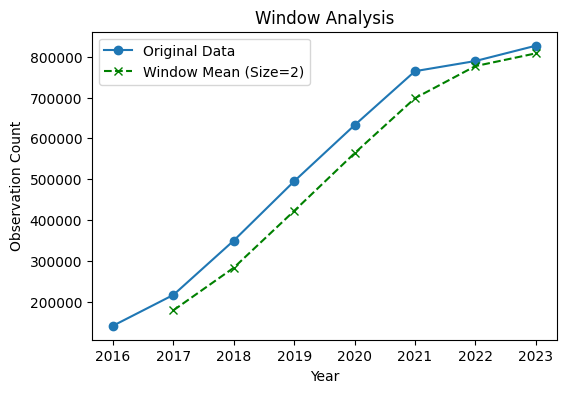

In [16]:
#Window Analyis 
plt.figure(figsize=(6, 4))
data = [sf_2016.shape[0], sf_2017.shape[0], sf_2018.shape[0], sf_2019.shape[0],sf_2020.shape[0],sf_2021.shape[0],sf_2022.shape[0],sf_2023.shape[0]]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022,2023]

# Convert the data to a Pandas Series
series = pd.Series(data, index=years)

window_size = 2  # Define the window size for analysis

# Perform window analysis (calculate mean within the window)
window_mean = series.rolling(window=window_size).mean()

print(window_mean)


# Plot the original data
plt.plot(series.index, series.values, label='Original Data', marker='o', linestyle='-')

# Plot the window mean
plt.plot(window_mean.index, window_mean.values, label=f'Window Mean (Size={window_size})', marker='x',color='green', linestyle='--')
#plt.vlines(series.index, [0], series.values, colors='blue', linestyles='dashed', alpha=0.5)  # Vertical bar lines

plt.xlabel('Year')
plt.ylabel('Observation Count')
plt.title('Window Analysis')
plt.legend()
plt.xticks(years)
#plt.grid(True)
plt.show()



Intervals between years: [ 75590 133280 145376 137461 132307  24898  37516]
Variance between successive years: 2246814733.8367343


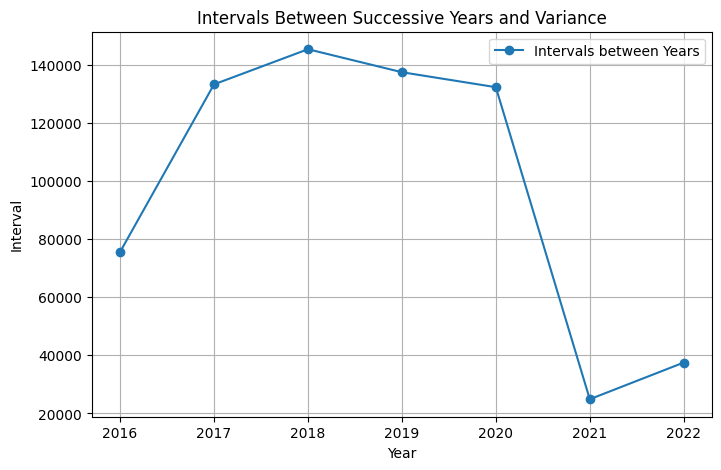

In [17]:
#calculating the interval. Interval is the differece between observations in consecutive years

observations = [sf_2016.shape[0], sf_2017.shape[0], sf_2018.shape[0], sf_2019.shape[0],sf_2020.shape[0],sf_2021.shape[0],sf_2022.shape[0],sf_2023.shape[0]]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022,2023]

# Convert the data to a Pandas Series
series = pd.Series(observations, index=years)

# Calculate the interval
intervals = np.diff(series)  # calculate the differences between years

# Calculate variance between observations of successive years, 
#"variance" is a measure of the spread or variability among these differences. my note 
variance_between_years = np.var(intervals)

print("Intervals between years:", intervals)
print("Variance between successive years:", variance_between_years)


# Plotting the intervals between successive years
plt.figure(figsize=(8, 5))
plt.plot(range(2016, 2023), intervals, marker='o', linestyle='-', label='Intervals between Years')
#plt.axhline(y=variance_between_years, color='r', linestyle='--', label='Variance between Intervals')

plt.xlabel('Year')
plt.ylabel('Interval')
plt.title('Intervals Between Successive Years and Variance')
plt.legend()
plt.grid(True)
plt.show()

## Distribution (Observation per user)

Total number of observations in San Francisco 2016: 140620


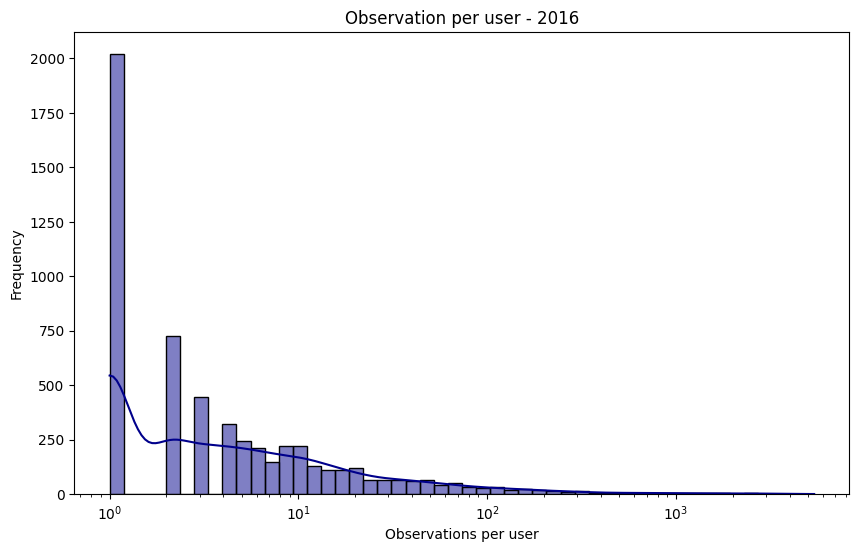

Total number of observations in San Francisco 2017: 216210


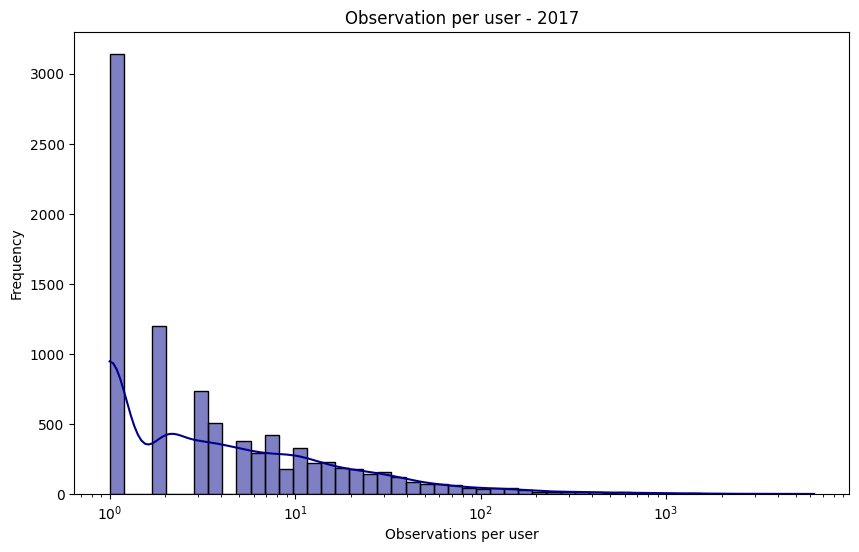

Total number of observations in San Francisco 2018: 349490


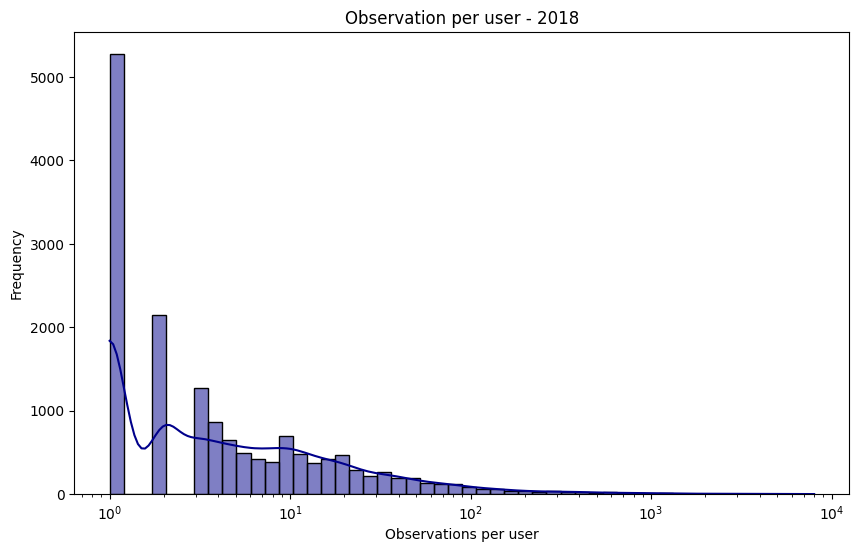

Total number of observations in San Francisco 2019: 494866


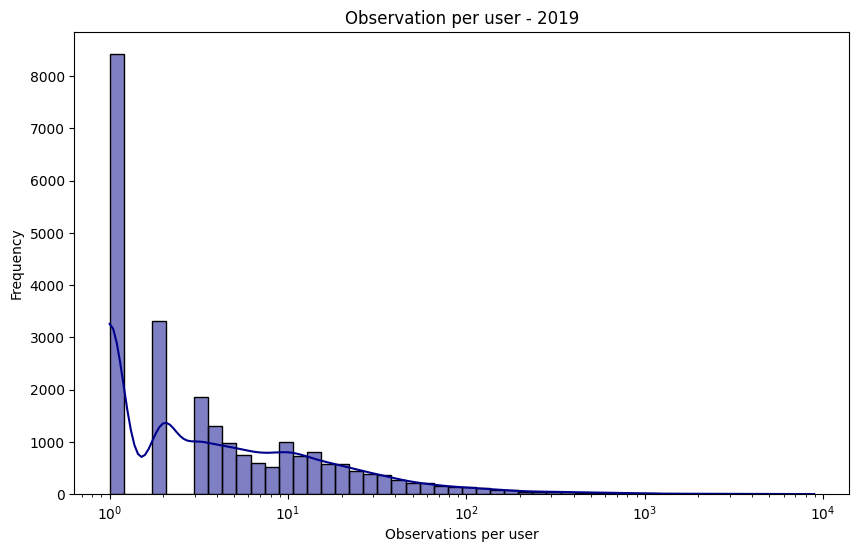

Total number of observations in San Francisco 2020: 632327


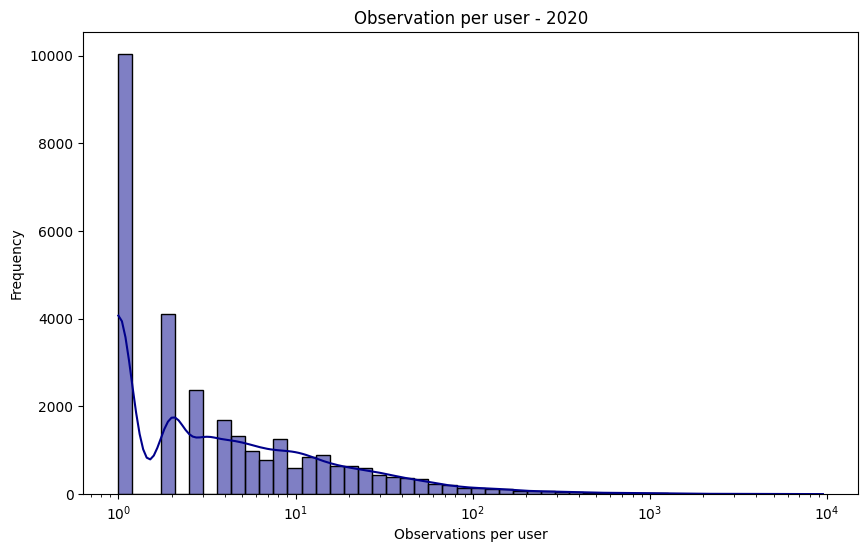

Total number of observations in San Francisco 2021: 764634


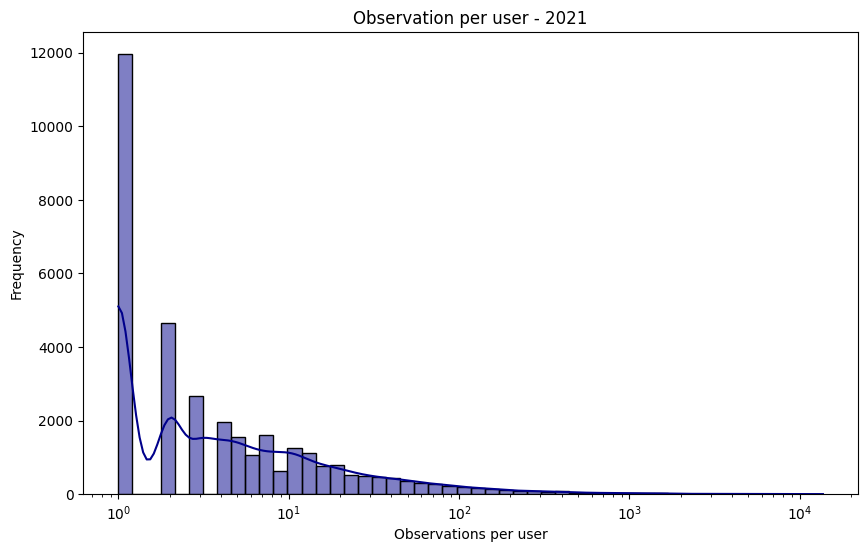

Total number of observations in San Francisco 2022: 789532


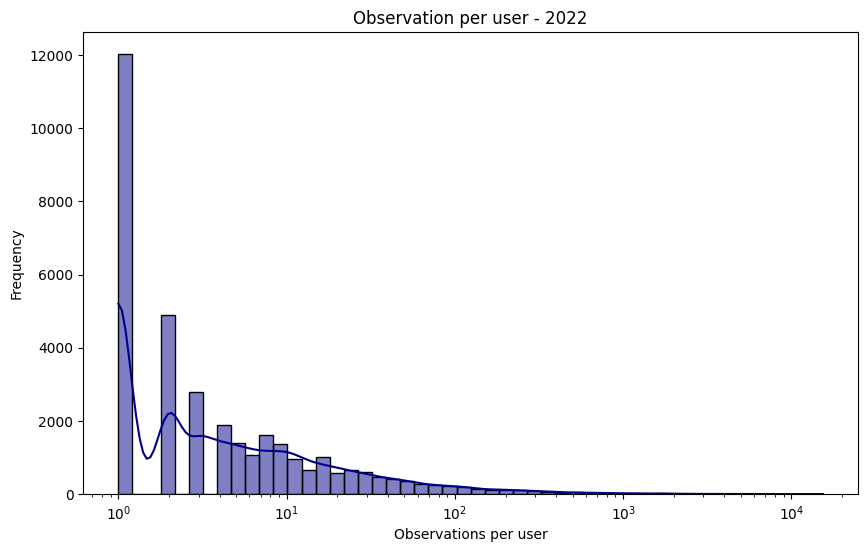

Total number of observations in San Francisco 2023: 827048


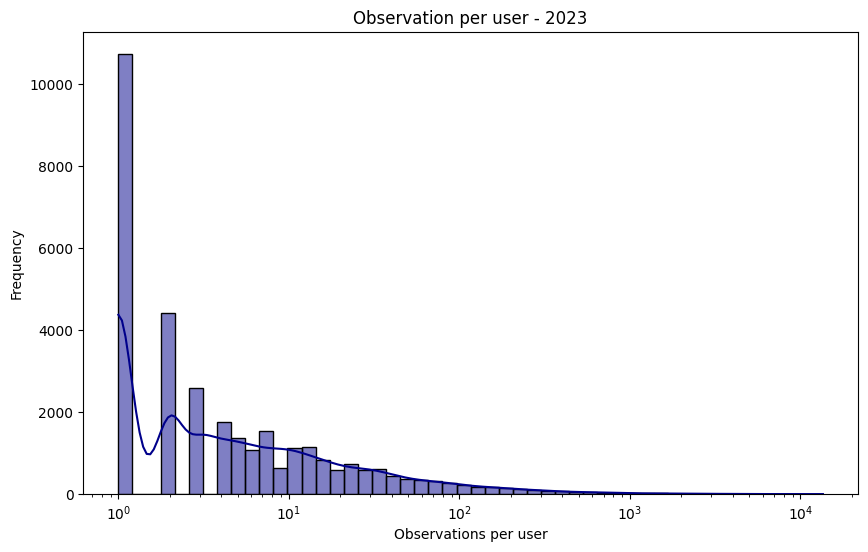

      user_id  total_obs
0        3342       5404
1       16101       4089
2       13979       3141
3      179103       2864
4        3494       2699
...       ...        ...
5697   320314          1
5698   320910          1
5699   320938          1
5700   276293          1
5701  6273589          1

[5702 rows x 2 columns]


In [18]:
datasets = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Create a dictionary to store DataFrames for each year
observation_per_year = {}

for i, df in enumerate(datasets): #iterate through dfs
    year = years[i] # iterate through years
    
     #Calculate Observations per User. df will have user_id and totalobs
    obs_per_user = df['user_id'].value_counts().rename_axis('user_id').reset_index(name='total_obs')

    #store data in Dictionary
    observation_per_year[year] = obs_per_user
    print(f'Total number of observations in San Francisco {year}:', df.shape[0])

    # plot
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=obs_per_user, x="total_obs", log_scale=True, bins=50, color='darkblue', kde=True)
    #ax = sns.kdeplot(data=obs_per_user['total_obs'], log_scale=True, color='darkblue')
    ax.set(xlabel='Observations per user', ylabel='Frequency', title=f"Observation per user - {year}")
    plt.show()
    

# Access each DataFrame by year
df_2016 = observation_per_year[2016]
df_2017 = observation_per_year[2017]
df_2018 = observation_per_year[2018]
df_2019 = observation_per_year[2019]
df_2020 = observation_per_year[2020]
df_2021 = observation_per_year[2021]
df_2022 = observation_per_year[2022]
df_2023 = observation_per_year[2023]

# Example: Display the DataFrame for 2016
print(df_2016)


2024-03-27 15:17:12.354 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000302)
2024-03-27 15:17:12.361 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.00021)
2024-03-27 15:17:12.429 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000305)


sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh         0.000210   36227.874460   36241.171605     inf      0.474775   
uniform          0.000302    1722.941927    1736.239071     inf      0.949906   
gamma            0.000305  347451.413376  347471.359092     inf      0.638464   

          ks_pvalue  
rayleigh        0.0  
uniform         0.0  
gamma           0.0

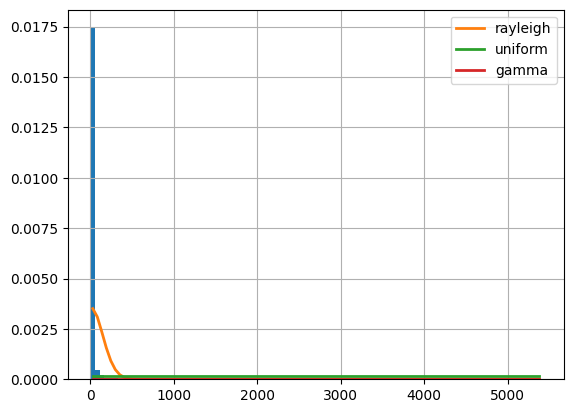

In [19]:
#test
data = df_2016['total_obs']

#normalise log transform
#log_transformed_data = np.log(data)

from fitter import Fitter
f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()

f.summary()

2024-03-27 15:17:12.647 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000302)
2024-03-27 15:17:12.649 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1.7e-05)
2024-03-27 15:17:12.653 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.00021)
2024-03-27 15:17:12.724 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000305)
2024-03-27 15:17:12.778 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000227)
2024-03-27 15:17:12.780 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1.7e-05)
2024-03-27 15:17:12.784 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.000153)
2024-03-27 15:17:12.861 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted g

Summary for 2016:
          sumsquare_error            aic            bic  kl_div  ks_statistic  \
expon            0.000017   23471.311020   23484.608164     inf      0.506644   
rayleigh         0.000210   36227.874460   36241.171605     inf      0.474775   
uniform          0.000302    1722.941927    1736.239071     inf      0.949906   
gamma            0.000305  347451.413376  347471.359092     inf      0.638464   

          ks_pvalue  
expon           0.0  
rayleigh        0.0  
uniform         0.0  
gamma           0.0  
Summary for 2017:
          sumsquare_error            aic            bic    kl_div  \
expon            0.000017   28138.896883   28153.120352       inf   
rayleigh         0.000153   42612.105662   42626.329131       inf   
uniform          0.000227    1753.311471    1767.534940       inf   
gamma            0.000230  404298.382372  404319.717576  0.048156   

          ks_statistic  ks_pvalue  
expon         0.497250        0.0  
rayleigh      0.472354        

2024-03-27 15:17:12.930 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=7.8e-05)
2024-03-27 15:17:13.049 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000145)
2024-03-27 15:17:13.185 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000117)
2024-03-27 15:17:13.187 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=3.3e-05)
2024-03-27 15:17:13.191 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=5.7e-05)


Summary for 2018:
          sumsquare_error            aic            bic    kl_div  \
expon            0.000025   39041.552433   39056.913371       inf   
rayleigh         0.000078   85354.510532   85369.871470       inf   
uniform          0.000143    1801.664238    1817.025176       inf   
gamma            0.000145  519454.938676  519477.980083  0.036789   

          ks_statistic  ks_pvalue  
expon         0.462906        0.0  
rayleigh      0.462097        0.0  
uniform       0.962275        0.0  
gamma         0.780319        0.0  


2024-03-27 15:17:13.313 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000118)
2024-03-27 15:17:13.370 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000103)
2024-03-27 15:17:13.371 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=3e-05)
2024-03-27 15:17:13.375 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=4.8e-05)


Summary for 2019:
          sumsquare_error            aic            bic    kl_div  \
expon            0.000033   46746.349393   46762.550953       inf   
rayleigh         0.000057  113222.378127  113238.579687       inf   
uniform          0.000117    1823.053233    1839.254792       inf   
gamma            0.000118  578286.725144  578311.027484  0.032456   

          ks_statistic  ks_pvalue  
expon         0.467695        0.0  
rayleigh      0.461878        0.0  
uniform       0.964636        0.0  
gamma         0.839480        0.0  


2024-03-27 15:17:13.597 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000104)
2024-03-27 15:17:13.653 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=5e-05)
2024-03-27 15:17:13.654 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2.7e-05)
2024-03-27 15:17:13.658 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.8e-05)


Summary for 2020:
          sumsquare_error            aic            bic    kl_div  \
expon            0.000030   47514.984427   47531.587678       inf   
rayleigh         0.000048  122163.377418  122179.980670       inf   
uniform          0.000103    1835.619852    1852.223104       inf   
gamma            0.000104  612514.392225  612539.297103  0.030825   

          ks_statistic  ks_pvalue  
expon         0.476906        0.0  
rayleigh      0.462011        0.0  
uniform       0.965232        0.0  
gamma         0.792125        0.0  


2024-03-27 15:17:13.876 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=5.1e-05)
2024-03-27 15:17:13.936 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2.5e-05)
2024-03-27 15:17:13.937 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=4e-05)
2024-03-27 15:17:13.941 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.4e-05)


Summary for 2021:
          sumsquare_error            aic            bic    kl_div  \
rayleigh         0.000018  203537.811263  203554.695315       inf   
expon            0.000027   64861.195220   64878.079271       inf   
uniform          0.000050    1908.913400    1925.797451       inf   
gamma            0.000051  848005.735632  848031.061709  0.024428   

          ks_statistic  ks_pvalue  
rayleigh      0.466897        0.0  
expon         0.493508        0.0  
uniform       0.969038        0.0  
gamma         0.878411        0.0  


2024-03-27 15:17:14.155 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4e-05)
2024-03-27 15:17:14.214 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=5.1e-05)
2024-03-27 15:17:14.215 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2.2e-05)
2024-03-27 15:17:14.220 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2.1e-05)


Summary for 2022:
          sumsquare_error            aic            bic    kl_div  \
rayleigh         0.000014  203494.938527  203511.842843       inf   
expon            0.000025   71168.794018   71185.698334       inf   
uniform          0.000040    1932.216657    1949.120973       inf   
gamma            0.000040  978897.472098  978922.828571  0.022109   

          ks_statistic  ks_pvalue  
rayleigh      0.472308        0.0  
expon         0.496176        0.0  
uniform       0.970462        0.0  
gamma         0.895550        0.0  


2024-03-27 15:17:14.425 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=5.1e-05)


Summary for 2023:
          sumsquare_error            aic            bic    kl_div  \
rayleigh         0.000021  160595.113395  160611.912382       inf   
expon            0.000022   56625.222182   56642.021170       inf   
uniform          0.000051    1906.651165    1923.450153       inf   
gamma            0.000051  841102.319486  841127.517968  0.030042   

          ks_statistic  ks_pvalue  
rayleigh      0.459457        0.0  
expon         0.482595        0.0  
uniform       0.966547        0.0  
gamma         0.871963        0.0  


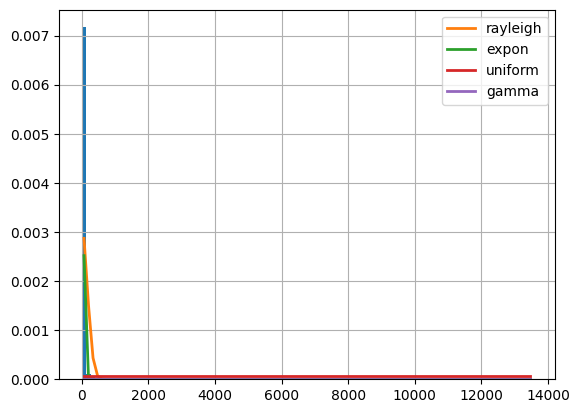

In [20]:

df_2016 = observation_per_year[2016]['total_obs'].sum()
df_2017 = observation_per_year[2017]['total_obs'].sum()
df_2018 = observation_per_year[2018]['total_obs'].sum()
df_2019 = observation_per_year[2019]['total_obs'].sum()
df_2020 = observation_per_year[2020]['total_obs'].sum()
df_2021 = observation_per_year[2021]['total_obs'].sum()
df_2022 = observation_per_year[2022]['total_obs'].sum()
df_2023 = observation_per_year[2023]['total_obs'].sum()

fitted_distributions = []


# Iterate over each year
for year, df in observation_per_year.items():
    # Calculate the sum of observations for the current year
    total_sum = df['total_obs']
    
    # Fit distributions to the summed data
    f = Fitter(df['total_obs'], distributions=['gamma', 'rayleigh', 'uniform', 'expon'])
    f.fit()
    fitted_distributions.append(f)
    
    # Print summary
    print(f"Summary for {year}:")
    print(f.summary())

# Plot histograms or perform any other desired analysis using the fitted distributions
# For example:
# for year, f in zip(observation_per_year.keys(), fitted_distributions):
#     sns.histplot(data=f.data, color='darkblue', bins=50)
#     plt.title(f'Histogram for {year}')
#     plt.show()


In [21]:
def observation_per_user(data, year):
    obs_per_user = data['user_id'].value_counts().rename_axis('user_id').reset_index(name='total_obs')
    ax = sns.displot(data=obs_per_user, x="total_obs", log_scale=(True), bins=50, color='darkblue')
    #ax = sns.displot(data=obs_per_user, x="total_obs", log_scale=(True, True), kde_kws={'log_scale': (True, True)})
    ax.set(xlabel='observation per user', ylabel='frequency', title=f"Observation per user - {year}")
    #plt.show()

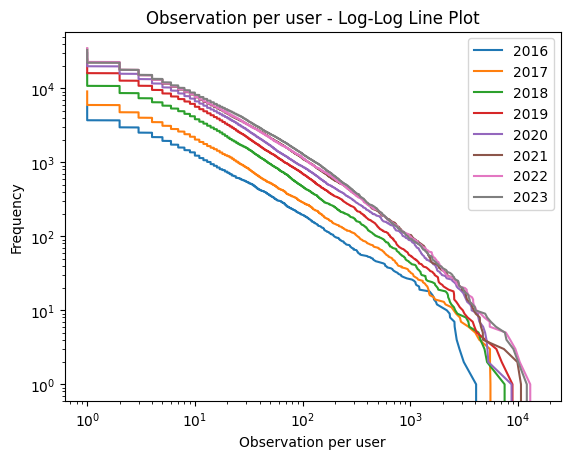

In [22]:
def observation_per_user(data, year):
    obs_per_user = data['user_id'].value_counts().rename_axis('user_id').reset_index(name='total_obs')
    # Use plt.plot() with log scales for log-log line plot
    plt.plot(obs_per_user['total_obs'], obs_per_user.index, label=str(year))

# Dataframes and years
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Plot each year on the same log-log line plot
for df, year in zip(dataframes, years):
    observation_per_user(df, year)

# plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Observation per user')
plt.ylabel('Frequency')
plt.title('Observation per user - Log-Log Line Plot')
plt.legend()
plt.show()


## Fitting regression line for observation

## All in One 

Year: 2016
Original Scale Slope: 0.2388473575719806
Regression Line Coefficients (log-log scale): Intercept=12.295297357701319, Slope=-1.43193060233493
Year: 2017
Original Scale Slope: 0.24265143259322364
Regression Line Coefficients (log-log scale): Intercept=12.840595057134319, Slope=-1.416129299199345
Year: 2018
Original Scale Slope: 0.2466329191324085
Regression Line Coefficients (log-log scale): Intercept=13.55058334995828, Slope=-1.3998542051400389
Year: 2019
Original Scale Slope: 0.24992976492407046
Regression Line Coefficients (log-log scale): Intercept=13.970028177329109, Slope=-1.3865753408947288
Year: 2020
Original Scale Slope: 0.24992976492407046
Regression Line Coefficients (log-log scale): Intercept=13.970028177329109, Slope=-1.3865753408947288
Year: 2021
Original Scale Slope: 0.24956610237775903
Regression Line Coefficients (log-log scale): Intercept=14.267709901734955, Slope=-1.3880314594909904
Year: 2022
Original Scale Slope: 0.2430851026793964
Regression Line Coeffici

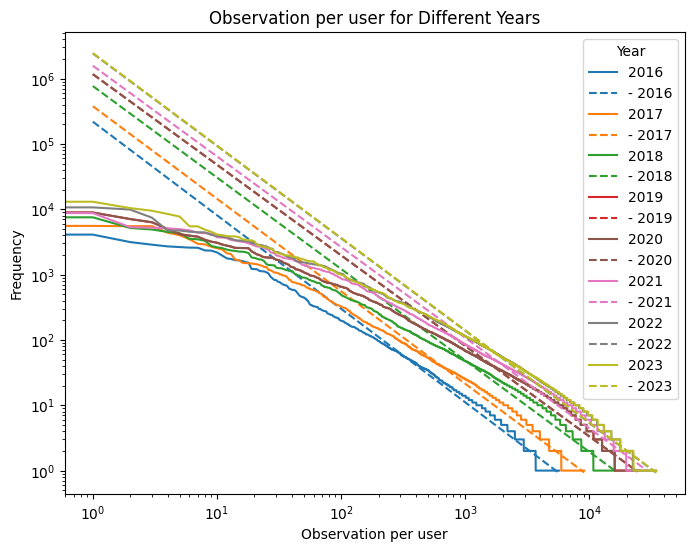

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def observation_per_user_fitting(dataframes, years):
    plt.figure(figsize=(8, 6))  
    
    colors = plt.cm.tab10(np.linspace(0, 1, len(dataframes)))  # Generate colors for each year
    
    for data, year, color in zip(dataframes, years, colors):
        obs_per_user = data['user_id'].value_counts().rename_axis('user_id').reset_index(name='total_obs')
        plt.plot(obs_per_user['total_obs'], color=color, label=str(year))

        # Fitting regression line using linear regression on the log-transformed data
        x = np.log(obs_per_user.index + 1)  # Adding 1 to avoid log(0)
        y = np.log(obs_per_user['total_obs'])

        coefficients = np.polyfit(x, y, 1)
        fit_line = np.exp(coefficients[1]) * (obs_per_user.index + 1)**coefficients[0]

        # Plot regression
        plt.plot(obs_per_user.index + 1, fit_line, color=color, linestyle='--', label=f'- {year}')

        # Print regression line coefficients
        original_scale_slope = np.exp(coefficients[0])
        print(f"Year: {year}")
        print(f"Original Scale Slope: {original_scale_slope}")
        print(f'Regression Line Coefficients (log-log scale): Intercept={coefficients[1]}, Slope={coefficients[0]}')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Observation per user')
    plt.ylabel('Frequency')
    plt.title('Observation per user for Different Years')
    plt.legend(title='Year', loc='upper right')
    plt.show()

dataframes = [sf_2016, sf_2017, sf_2018, sf_2019,sf_2019,sf_2020,sf_2021,sf_2022,sf_2023]
years = [2016, 2017, 2018, 2019, 2020,2021,2022,2023]

observation_per_user_fitting(dataframes, years)


## Individually 

In [24]:
def observation_per_user_fitting(data, year):
    fig = plt.figure(figsize=(6,4))
    obs_per_user = data['user_id'].value_counts().rename_axis('user_id').reset_index(name='total_obs')
    plt.plot(obs_per_user['total_obs'])

    # Fit a regression line using linear regression on the log-transformed data
    x = np.log(obs_per_user.index + 1)  # Adding 1 to avoid log(0)
    y = np.log(obs_per_user['total_obs'])
    
    
    coefficients = np.polyfit(x, y, 1)
    fit_line = np.exp(coefficients[1]) * (obs_per_user.index + 1)**coefficients[0]

    
    # Plot the regression line
    plt.plot(obs_per_user.index + 1, fit_line, label='Regression Line', linestyle='--')
    
    # Print regression line coefficients
    original_scale_slope = np.exp(coefficients[0])

    print(f"Original Scale Slope: {original_scale_slope}")
    print(f'Regression Line Coefficients (log-log scale): Intercept={coefficients[1]}, Slope={coefficients[0]}')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Observation per user')
    plt.ylabel('Frequency')
    plt.title(f"Observation per user - {year}")
    plt.show()
    plt.show()

Original Scale Slope: 0.2388473575719806
Regression Line Coefficients (log-log scale): Intercept=12.295297357701319, Slope=-1.43193060233493


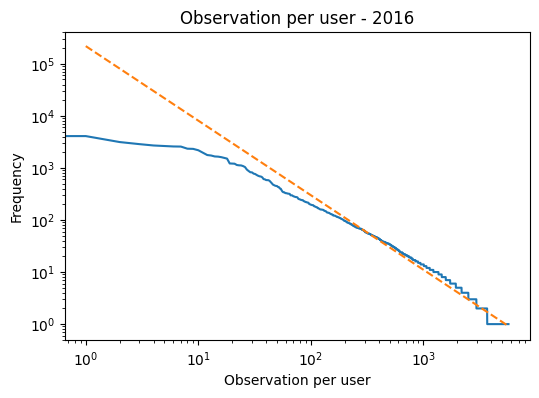

Original Scale Slope: 0.24265143259322364
Regression Line Coefficients (log-log scale): Intercept=12.840595057134319, Slope=-1.416129299199345


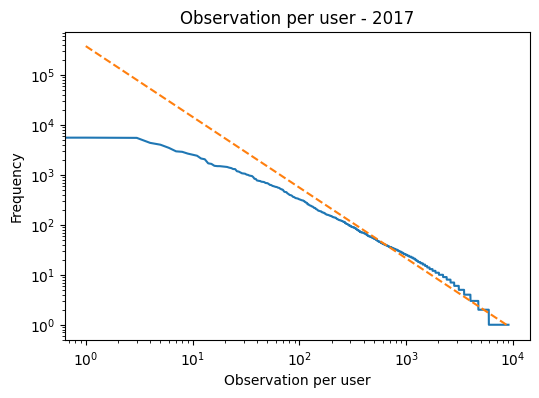

Original Scale Slope: 0.2466329191324085
Regression Line Coefficients (log-log scale): Intercept=13.55058334995828, Slope=-1.3998542051400389


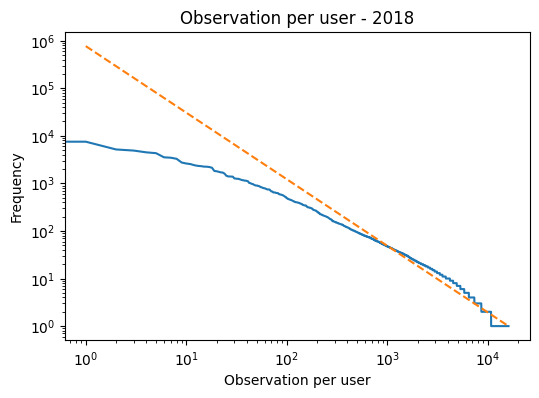

Original Scale Slope: 0.24992976492407046
Regression Line Coefficients (log-log scale): Intercept=13.970028177329109, Slope=-1.3865753408947288


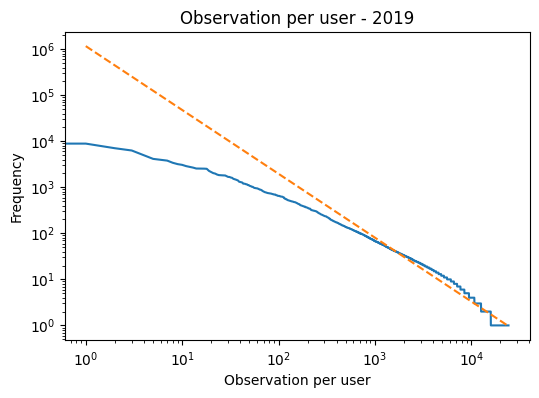

Original Scale Slope: 0.24992976492407046
Regression Line Coefficients (log-log scale): Intercept=13.970028177329109, Slope=-1.3865753408947288


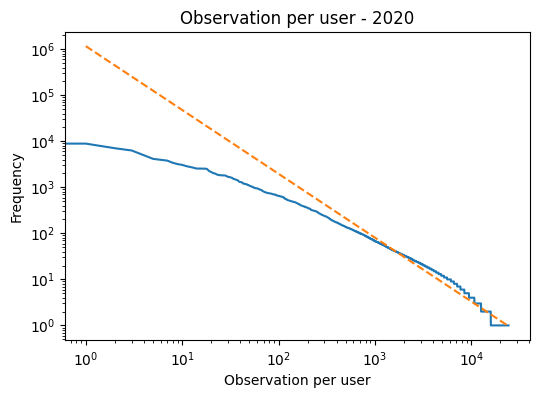

Original Scale Slope: 0.24956610237775903
Regression Line Coefficients (log-log scale): Intercept=14.267709901734955, Slope=-1.3880314594909904


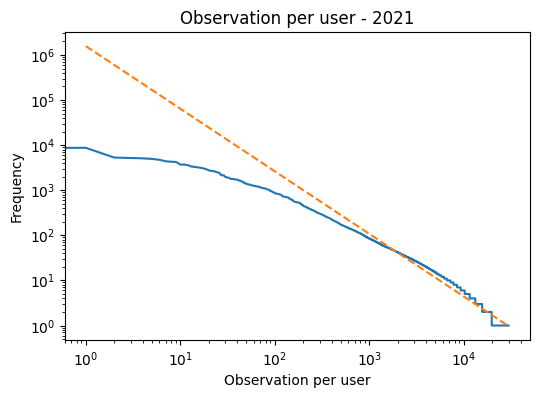

Original Scale Slope: 0.2430851026793964
Regression Line Coefficients (log-log scale): Intercept=14.69890174236194, Slope=-1.4143436801655338


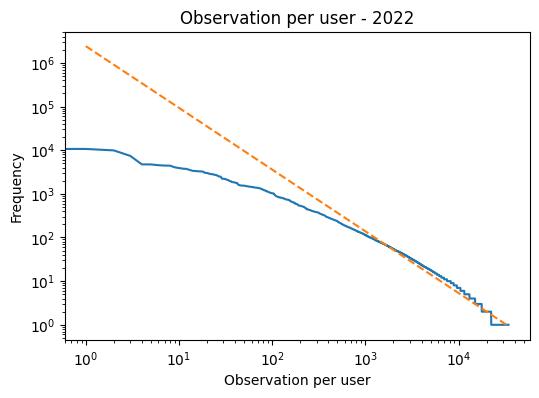

Original Scale Slope: 0.24308166809617435
Regression Line Coefficients (log-log scale): Intercept=14.710982781645795, Slope=-1.414357809404423


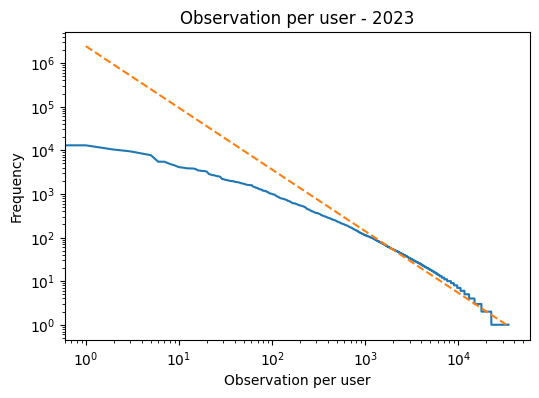

In [25]:
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019,sf_2019,sf_2020,sf_2021,sf_2022,sf_2023]
years = [2016, 2017, 2018, 2019, 2020,2021,2022,2023]

for df, year in zip(dataframes, years):
    observation_per_user_fitting(df, year)

# Fitting using fitter function 

# observation per day

In [26]:
def observation_per_day(data, year):
    data_copy = data.copy() # Create a copy of the DataFrame
    data_copy['time_observed_at'] = pd.to_datetime(data_copy['time_observed_at'])
    
    # set 'time_observed_at' as the index
    data_copy.set_index('time_observed_at', inplace=True)
    
    # count daily counts 
    daily_counts = data_copy.resample('D').size()
    
    # Reset the index to avoid issues on subsequent runs
    data_copy.reset_index(inplace=True)
    
    # Plotting
    plt.plot(daily_counts.index, daily_counts, label=str(year))
    
    return daily_counts

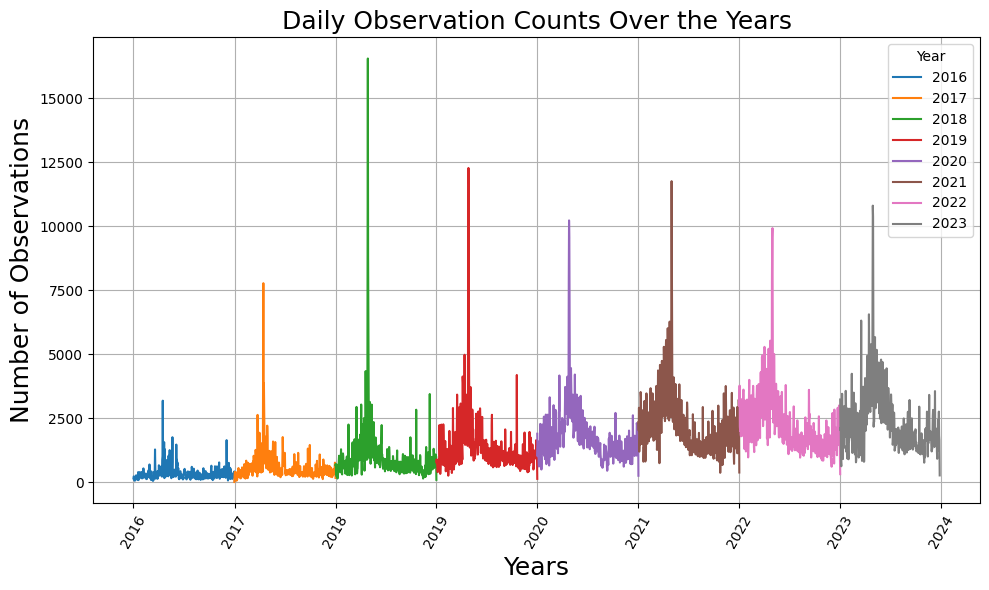

In [27]:

dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_day(df, year)

plt.title('Daily Observation Counts Over the Years', fontsize=18)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of Observations', fontsize=18)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

# Set x-axis ticks to week numbers
plt.xticks(rotation=60)


plt.tight_layout()
plt.show()

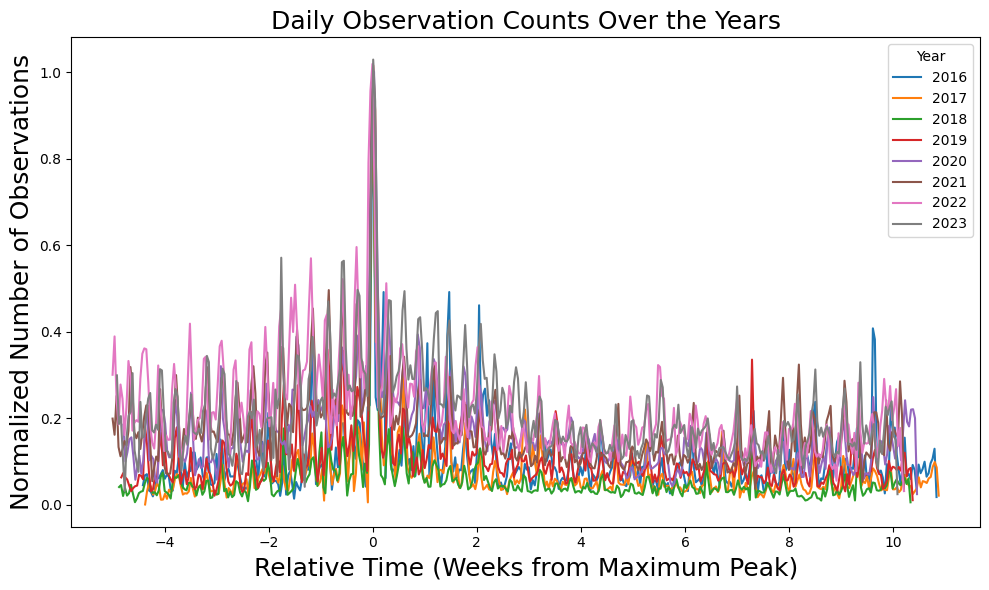

In [28]:
def observation_per_day_rs(data, year):
    data_copy = data.copy() # Create a copy of the DataFrame
    data_copy['time_observed_at'] = pd.to_datetime(data_copy['time_observed_at'])
    
    # set 'time_observed_at' as the index
    data_copy.set_index('time_observed_at', inplace=True)
    
    # count daily counts 
    daily_counts = data_copy.resample('D').size()
    
    # Reset the index to avoid issues on subsequent runs
    data_copy.reset_index(inplace=True)
    
     # Find the maximum peak
    max_peak_day = daily_counts.idxmax()
    max_peak_value = daily_counts[max_peak_day]
    
    # Shift x-axis such that max peak is at 0
    x_values = (daily_counts.index - max_peak_day).days / 24
    
    # Normalize counts
    normalized_counts = daily_counts / max_peak_value
    
    # Print normalized peak value
    #print(f"Normalized Peak Value for {year}: {normalized_counts.max()}")  
    
    # Interpolate the data for smooth curve
    f = interp1d(x_values, normalized_counts, kind='cubic')  # 'cubic' for cubic spline interpolation
        
    # Generate new x values 
    x_smooth = np.linspace(min(x_values), max(x_values), 400)  
    #print(f"interpolate smooth data {year}: {x_smooth}")

    # Plot the smoothed curve
    plt.plot(x_smooth, f(x_smooth), label=f'{year}')    
    
    return daily_counts


dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_day_rs(df, year)

plt.title('Daily Observation Counts Over the Years', fontsize=18)
plt.xlabel('Relative Time (Weeks from Maximum Peak)', fontsize=18)
plt.ylabel('Normalized Number of Observations', fontsize=18)
plt.legend(title='Year', loc='upper right')
#plt.grid(True)

plt.tight_layout()
plt.show()


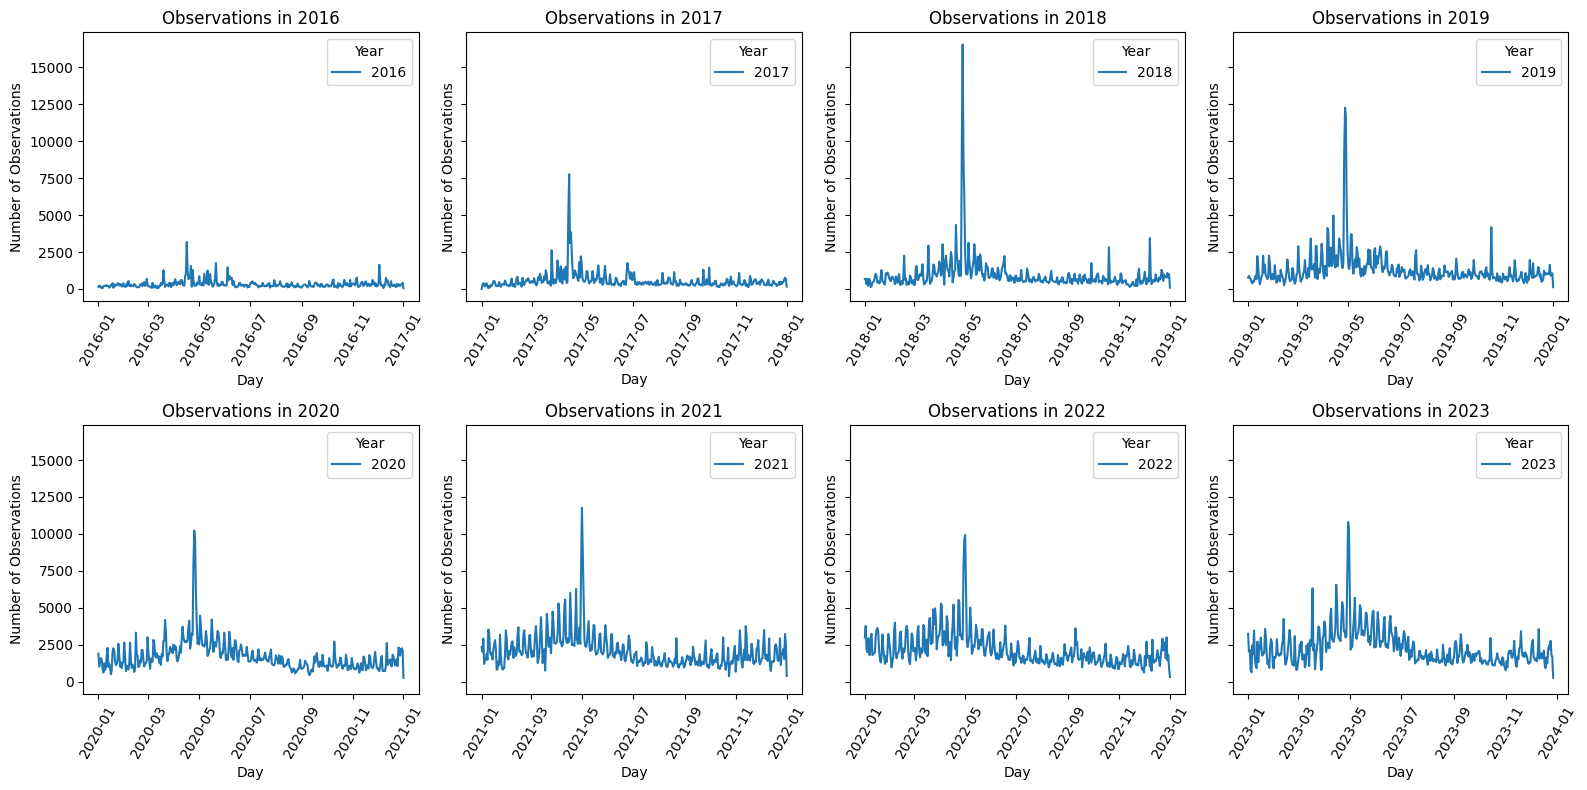

In [29]:
# Dataframes and years
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Create separate subplots for each year
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey=True)
axes = axes.flatten()

# Plotting
for i, (df, year) in enumerate(zip(dataframes, years)):
    #ax = axes[i]
    plt.sca(axes[i])
    observation_per_day(df, year)
    
    plt.title(f'Observations in {year}')
    plt.xlabel('Day')
    plt.ylabel('Number of Observations')
    plt.legend(title='Year', loc='upper right')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()


In [31]:
# Test
data_t = df_2016

data_t_cleaned = data_t.dropna().values

# Fit the distribution using Fitter
f = Fitter(data_t_cleaned, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
f.summary()

plt.title('Daily Observation 2016', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

AttributeError: 'numpy.int64' object has no attribute 'dropna'

## Fit the distribution using Fitter


2024-03-27 15:21:41.934 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6e-05)
2024-03-27 15:21:41.939 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.6e-05)
2024-03-27 15:21:41.940 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2.2e-05)
2024-03-27 15:21:41.974 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7e-05)


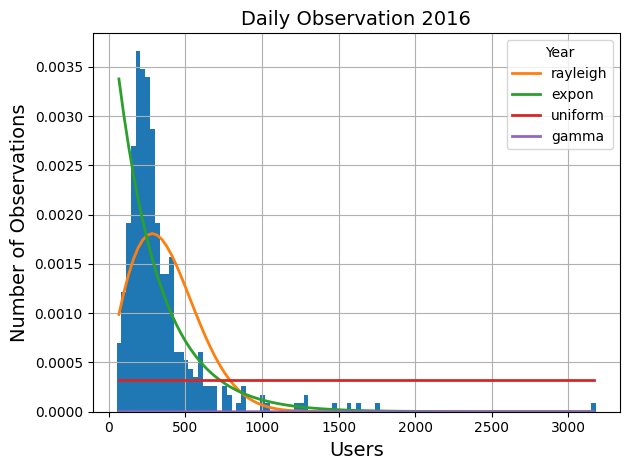

2024-03-27 15:21:42.198 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=7e-06)
2024-03-27 15:21:42.199 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=9e-06)
2024-03-27 15:21:42.199 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1.7e-05)
2024-03-27 15:21:42.225 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1.8e-05)


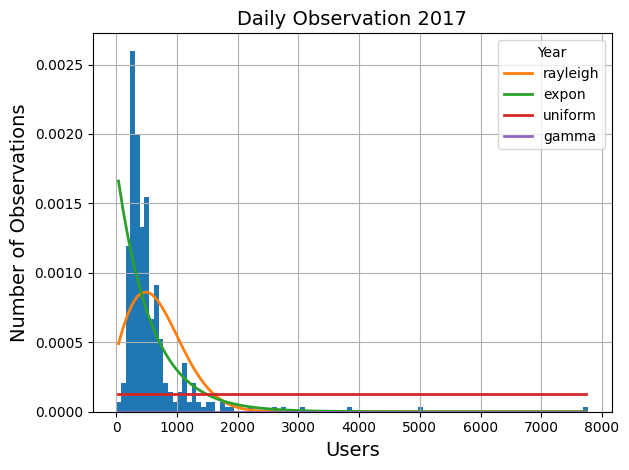

2024-03-27 15:21:42.582 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2e-06)
2024-03-27 15:21:42.582 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=5e-06)
2024-03-27 15:21:42.583 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2e-06)
2024-03-27 15:21:42.615 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=5e-06)


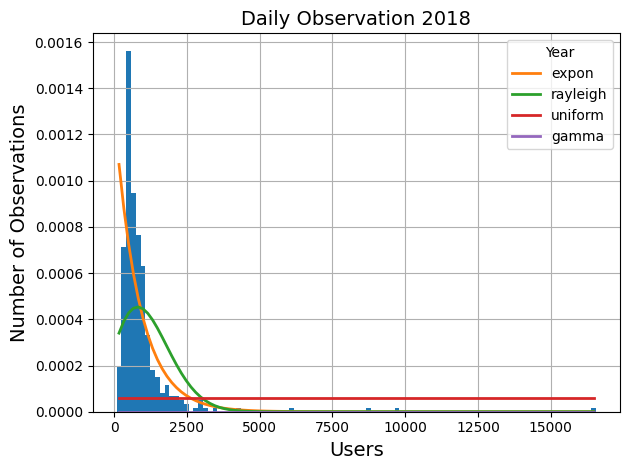

2024-03-27 15:21:42.788 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=4e-06)
2024-03-27 15:21:42.789 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2e-06)
2024-03-27 15:21:42.790 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2e-06)
2024-03-27 15:21:42.820 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


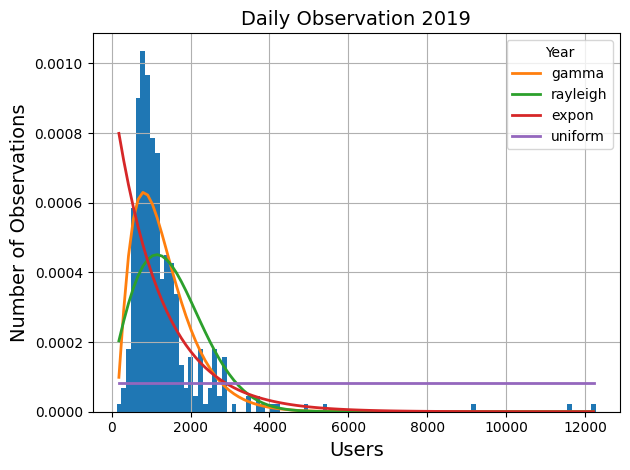

2024-03-27 15:21:42.984 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=4e-06)
2024-03-27 15:21:42.987 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-03-27 15:21:42.989 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2e-06)
2024-03-27 15:21:43.017 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=5e-06)


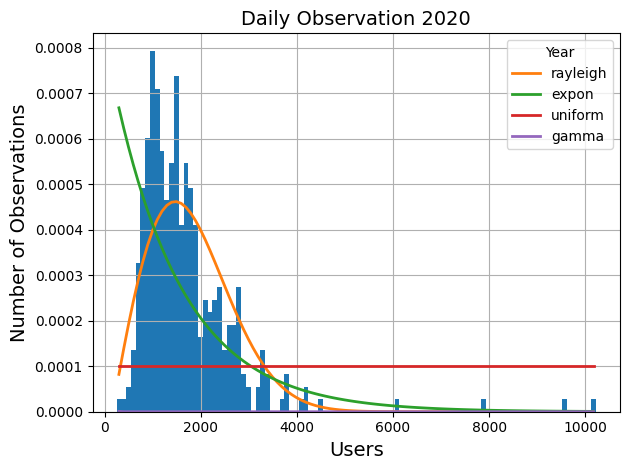

2024-03-27 15:21:43.194 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=3e-06)
2024-03-27 15:21:43.196 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-03-27 15:21:43.198 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2e-06)
2024-03-27 15:21:43.221 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4e-06)


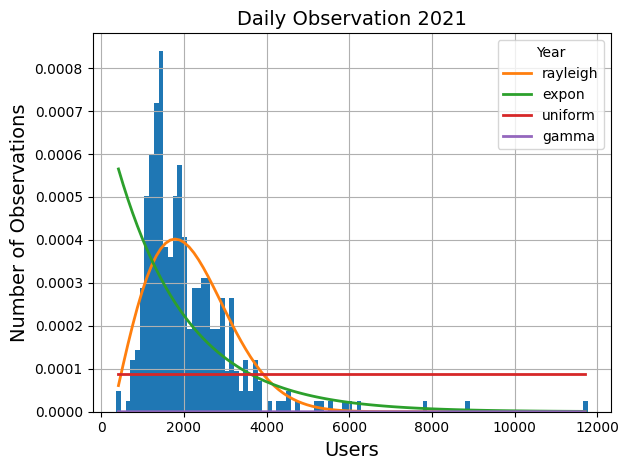

2024-03-27 15:21:43.403 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-03-27 15:21:43.404 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2e-06)
2024-03-27 15:21:43.404 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=3e-06)
2024-03-27 15:21:43.434 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4e-06)


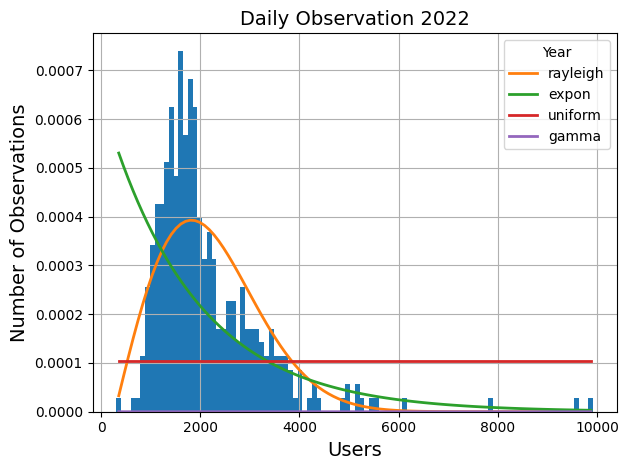

2024-03-27 15:21:43.605 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=2e-06)
2024-03-27 15:21:43.606 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:21:43.607 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2e-06)
2024-03-27 15:21:43.641 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=3e-06)


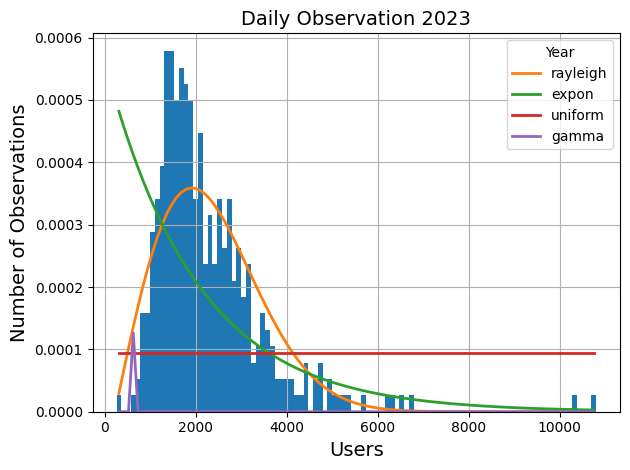

In [32]:
dai_ob_2016 = observation_per_day(sf_2016,2016)
dai_ob_2017 = observation_per_day(sf_2017,2017)
dai_ob_2018 = observation_per_day(sf_2018,2018)
dai_ob_2019 = observation_per_day(sf_2019,2019)
dai_ob_2020 = observation_per_day(sf_2020,2020)
dai_ob_2021 = observation_per_day(sf_2021,2021)
dai_ob_2022 = observation_per_day(sf_2022,2022)
dai_ob_2023 = observation_per_day(sf_2023,2023)

dai_ob_c_2016 = dai_ob_2016.dropna().values
dai_ob_c_2017 = dai_ob_2017.dropna().values
dai_ob_c_2018 = dai_ob_2018.dropna().values
dai_ob_c_2019 = dai_ob_2019.dropna().values
dai_ob_c_2020 = dai_ob_2020.dropna().values
dai_ob_c_2021 = dai_ob_2021.dropna().values
dai_ob_c_2022 = dai_ob_2022.dropna().values
dai_ob_c_2023 = dai_ob_2023.dropna().values


# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2016, distributions=['gamma', 'rayleigh', 'uniform','expon'])
f.fit()
f.summary()

plt.title('Daily Observation 2016', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2017, distributions=['gamma', 'rayleigh', 'uniform','expon'])
f.fit()
f.summary()

plt.title('Daily Observation 2017', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2018, distributions=['gamma', 'rayleigh', 'uniform','expon'])
f.fit()
f.summary()

plt.title('Daily Observation 2018', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2019, distributions=['gamma', 'rayleigh', 'uniform','expon'])
f.fit()
f.summary()

plt.title('Daily Observation 2019', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2020, distributions=['gamma', 'rayleigh', 'uniform','expon'])
f.fit()
f.summary()

plt.title('Daily Observation 2020', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2021, distributions=['gamma', 'rayleigh', 'uniform','expon'])
f.fit()
f.summary()

plt.title('Daily Observation 2021', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2022, distributions=['gamma', 'rayleigh', 'uniform','expon'])
f.fit()
f.summary()

plt.title('Daily Observation 2022', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2023, distributions=['gamma', 'rayleigh', 'uniform','expon'])
f.fit()
f.summary()

plt.title('Daily Observation 2023', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()



2024-03-27 15:22:18.108 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.6e-05)
2024-03-27 15:22:18.122 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6e-05)
2024-03-27 15:22:18.124 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2.2e-05)
2024-03-27 15:22:18.151 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7e-05)


          sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh         0.000016    4087.276212    4095.086936     inf      0.212759   
expon            0.000022    2248.654318    2256.465042     inf      0.168870   
uniform          0.000060    1613.757657    1621.568380     inf      0.740639   
gamma            0.000070  144149.824918  144161.541003     inf      0.993957   

              ks_pvalue  
rayleigh   4.668148e-15  
expon      1.283367e-09  
uniform   2.042874e-207  
gamma      0.000000e+00  


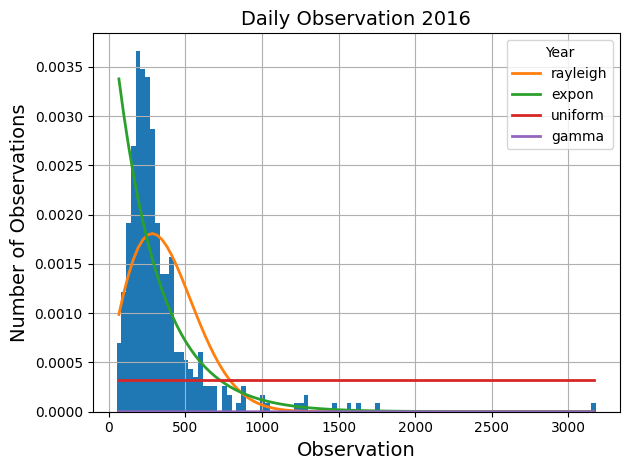

2024-03-27 15:22:18.492 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=7e-06)
2024-03-27 15:22:18.493 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1.7e-05)
2024-03-27 15:22:18.494 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=9e-06)
2024-03-27 15:22:18.520 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1.8e-05)


          sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh         0.000007    5436.191895    5444.002619     inf      0.258064   
expon            0.000009    2653.195434    2661.006158     inf      0.246220   
uniform          0.000017    1795.630827    1803.441551     inf      0.781349   
gamma            0.000018  261902.431366  261914.147452     inf      0.997275   

              ks_pvalue  
rayleigh   4.818394e-22  
expon      4.426505e-20  
uniform   7.692060e-238  
gamma      0.000000e+00  


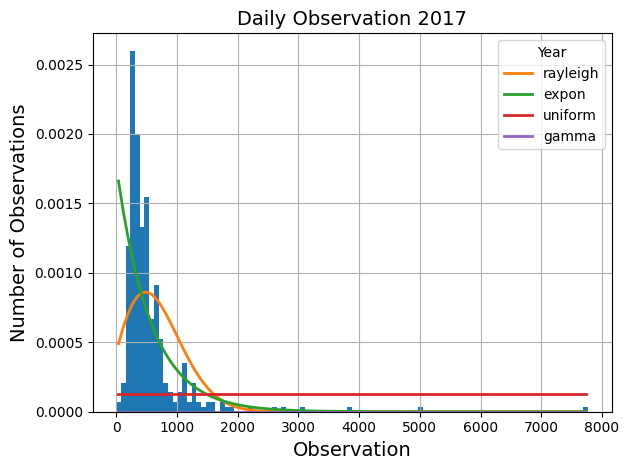

2024-03-27 15:22:18.739 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2e-06)
2024-03-27 15:22:18.740 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2e-06)
2024-03-27 15:22:18.741 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=5e-06)
2024-03-27 15:22:18.774 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=5e-06)


          sumsquare_error            aic            bic  kl_div  ks_statistic  \
expon            0.000002    3294.585210    3302.390477     inf      0.174974   
rayleigh         0.000002    6747.217282    6755.022548     inf      0.287077   
uniform          0.000005    1945.810586    1953.615852     inf      0.834217   
gamma            0.000005  367822.122768  367833.830668     inf      0.997268   

              ks_pvalue  
expon      2.855776e-10  
rayleigh   3.394653e-27  
uniform   2.002658e-284  
gamma      0.000000e+00  


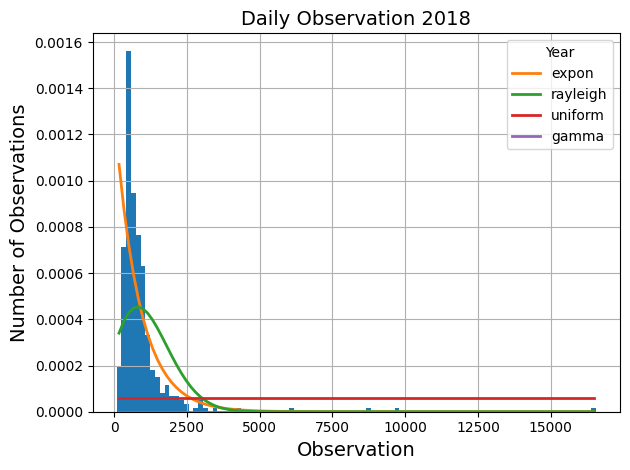

2024-03-27 15:22:18.989 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=4e-06)
2024-03-27 15:22:18.990 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2e-06)
2024-03-27 15:22:18.991 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2e-06)
2024-03-27 15:22:19.022 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma        7.367303e-07  3094.180851  3105.888751     inf      0.114894   
rayleigh     1.597961e-06  4122.435272  4130.240539     inf      0.221524   
expon        2.444554e-06  2441.782048  2449.587315     inf      0.238206   
uniform      4.485702e-06  1885.016890  1892.822156     inf      0.734604   

              ks_pvalue  
gamma      1.151467e-04  
rayleigh   2.954899e-16  
expon      9.311891e-19  
uniform   1.075278e-202  


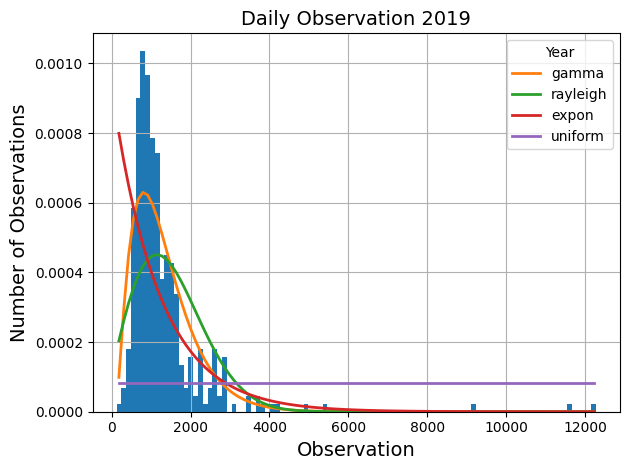

2024-03-27 15:22:19.224 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2e-06)
2024-03-27 15:22:19.225 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=4e-06)
2024-03-27 15:22:19.226 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-03-27 15:22:19.255 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=5e-06)


          sumsquare_error           aic           bic  kl_div  ks_statistic  \
rayleigh     6.774019e-07   3202.497545   3210.308269     inf      0.135587   
expon        2.141811e-06   2149.155200   2156.965924     inf      0.241551   
uniform      3.610177e-06   1845.647633   1853.458356     inf      0.668389   
gamma        4.614350e-06  92795.511215  92807.227300     inf      0.997275   

              ks_pvalue  
rayleigh   2.402719e-06  
expon      2.472049e-19  
uniform   3.958130e-162  
gamma      0.000000e+00  


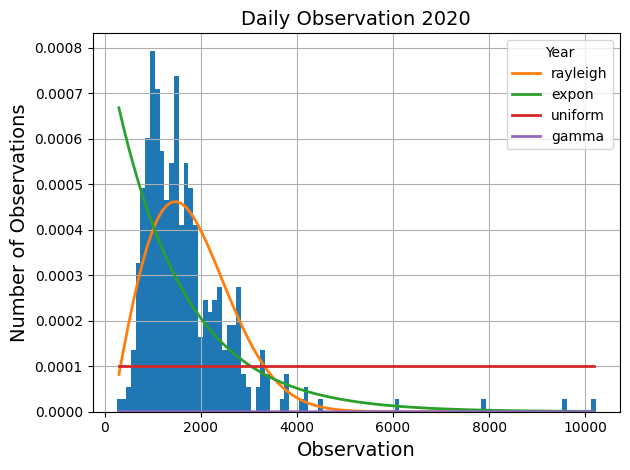

2024-03-27 15:22:19.538 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-03-27 15:22:19.539 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=3e-06)
2024-03-27 15:22:19.540 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2e-06)
2024-03-27 15:22:19.564 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4e-06)


          sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh     6.664688e-07    3198.950953    3206.756219     inf      0.122616   
expon        1.857288e-06    2159.004753    2166.810020     inf      0.258550   
uniform      2.887142e-06    1872.238636    1880.043903     inf      0.656107   
gamma        3.656880e-06  237766.874685  237778.582585     inf      0.997153   

              ks_pvalue  
rayleigh   2.969328e-05  
expon      4.562588e-22  
uniform   6.822312e-155  
gamma      0.000000e+00  


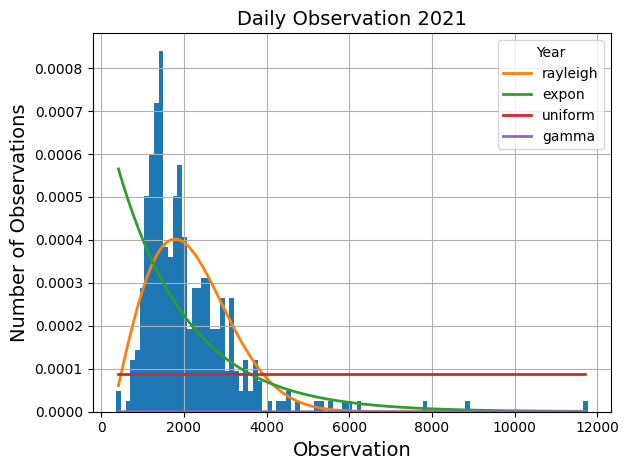

2024-03-27 15:22:19.790 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-03-27 15:22:19.790 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2e-06)
2024-03-27 15:22:19.791 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=3e-06)
2024-03-27 15:22:19.820 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4e-06)


          sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh     6.470202e-07    2606.499042    2614.304309     inf      0.130809   
expon        2.214358e-06    2030.567186    2038.372453     inf      0.272949   
uniform      3.048471e-06    1838.195130    1846.000396     inf      0.579936   
gamma        4.130380e-06  155654.652400  155666.360300     inf      0.997268   

              ks_pvalue  
rayleigh   6.393908e-06  
expon      1.388502e-24  
uniform   2.423582e-117  
gamma      0.000000e+00  


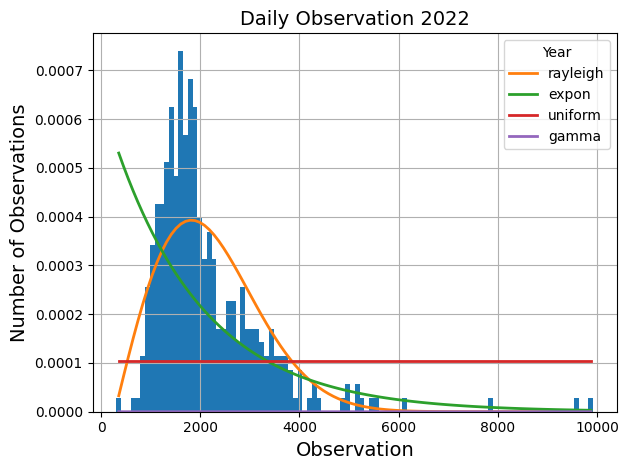

2024-03-27 15:22:20.031 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=2e-06)
2024-03-27 15:22:20.032 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2e-06)
2024-03-27 15:22:20.032 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:22:20.066 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=3e-06)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
rayleigh     4.092198e-07  2629.269843  2637.047599     inf      0.101164   
expon        1.719496e-06  2047.817272  2055.595027     inf      0.279250   
uniform      2.398064e-06  1856.643482  1864.421238     inf      0.587256   
gamma        3.306958e-06          inf          inf     inf      0.994460   

              ks_pvalue  
rayleigh   1.140915e-03  
expon      2.187540e-25  
uniform   5.381723e-119  
gamma      0.000000e+00  


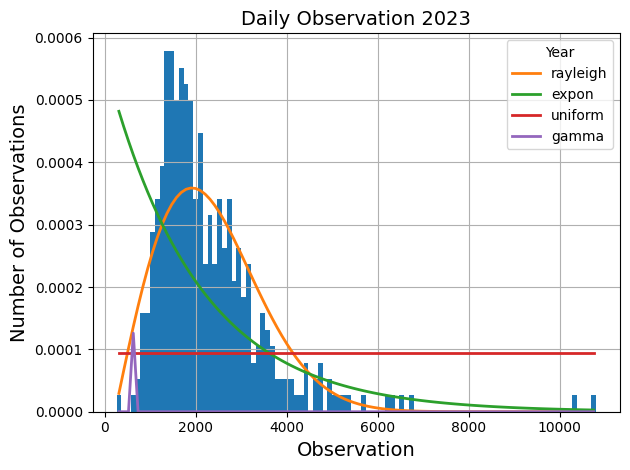

In [34]:
#Method 2 : this is efficient than the one i did up

def fit_and_plot_distribution(data, year):
    # Fit the distribution using Fitter
    f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform','expon'])
    f.fit()
    f.summary()
    
    # Summary table
    summary_table = f.summary()

    # Print summary table
    print(summary_table)

    plt.title(f'Daily Observation {year}', fontsize=14)
    plt.xlabel('Observation', fontsize=14)
    plt.ylabel('Number of Observations', fontsize=14)
    plt.legend(title='Year', loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    data = globals()[f'dai_ob_c_{year}']
    fit_and_plot_distribution(data, year)
    


In [ ]:
## NOT CORRECT. RECHECK THE CODE 
def fit_and_plot_distribution(data, year):
    # Call the observation_per_day function to generate the data
    daily_counts = observation_per_day(data, year)

    # Fit the distribution 
    f = Fitter(daily_counts, distributions=['gamma', 'rayleigh', 'uniform'])
    f.fit()
    f.summary()

    plt.title(f'Daily Observation {year}', fontsize=14)
    plt.xlabel('Users', fontsize=14)
    plt.ylabel('Number of Observations', fontsize=14)
    plt.legend(title='Year', loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    fit_and_plot_distribution(data, year)


In [ ]:
data_2023 = observation_per_day(sf_2023, 2023)

# Clean the data
data_t_cleaned = data_2023.dropna().values


# Fit the distribution using Fitter
f = Fitter(data_t_cleaned, distributions=['gamma', 'rayleigh', 'uniform', 'gumbel'])
f.fit()
f.summary()

plt.title('Daily Observation 2023', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)

# Plotting the legend
plt.legend(['gamma', 'rayleigh', 'uniform', 'gumbel'], title='Distributions', loc='upper right')
plt.grid(True)
plt.show()


## Fitting extreme value distribution

"""
https://openturns.github.io/openturns/1.17/auto_data_analysis/distribution_fitting/plot_fit_extreme_value_distribution.html
"""

In [35]:
import openturns.viewer as viewer

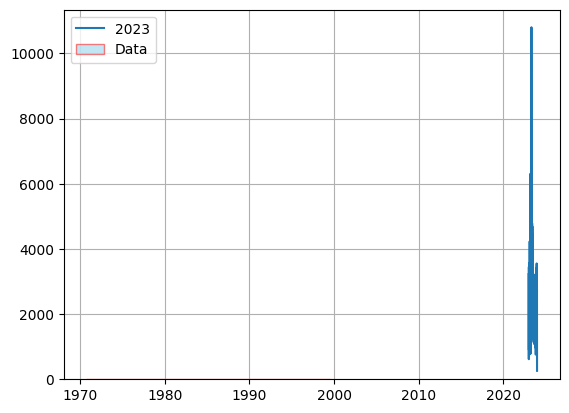

In [39]:
data_2023 = observation_per_day(sf_2023, 2023)

# Clean the data
data_t_cleaned = data_2023.dropna().values

# Convert data to OpenTURNS sample
sample = ot.Sample([[x] for x in data_t_cleaned])

# Build GEV 
myDistribution = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(sample)

# Plot
plt.hist(data_2023, bins=100, color='skyblue', edgecolor='red', density=True, alpha=0.5, label='Data')

# Plot the PDF 
pdf = myDistribution.drawPDF()
pdf.setColors(['red'])
pdf.setTitle('Fitted GEV Distribution')
#pdf.setLineWidth(2)



# Show legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
print(myDistribution)


In [ ]:
graph = myDistribution.drawPDF()
graph.add(ot.HistogramFactory().build(sample).drawPDF())
graph.setColors(["black", "red"])
graph.setLegends(["GEV fitting", "histogram"])
graph.setLegendPosition("topright")


(array([2.62741450e-05, 0.00000000e+00, 0.00000000e+00, 2.62741450e-05,
        5.25482899e-05, 1.57644870e-04, 1.57644870e-04, 2.89015594e-04,
        3.41563884e-04, 3.94112174e-04, 5.78031189e-04, 5.78031189e-04,
        4.99208754e-04, 5.51757044e-04, 5.25482899e-04, 4.99208754e-04,
        3.41563884e-04, 4.46660464e-04, 2.36467305e-04, 3.15289739e-04,
        2.36467305e-04, 3.41563884e-04, 2.62741450e-04, 3.41563884e-04,
        2.10193160e-04, 2.62741450e-04, 1.83919015e-04, 2.36467305e-04,
        7.88224349e-05, 1.05096580e-04, 1.57644870e-04, 1.31370725e-04,
        1.05096580e-04, 5.25482899e-05, 5.25482899e-05, 5.25482899e-05,
        5.25482899e-05, 2.62741450e-05, 2.62741450e-05, 7.88224349e-05,
        0.00000000e+00, 5.25482899e-05, 7.88224349e-05, 0.00000000e+00,
        5.25482899e-05, 2.62741450e-05, 2.62741450e-05, 2.62741450e-05,
        2.62741450e-05, 0.00000000e+00, 0.00000000e+00, 2.62741450e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

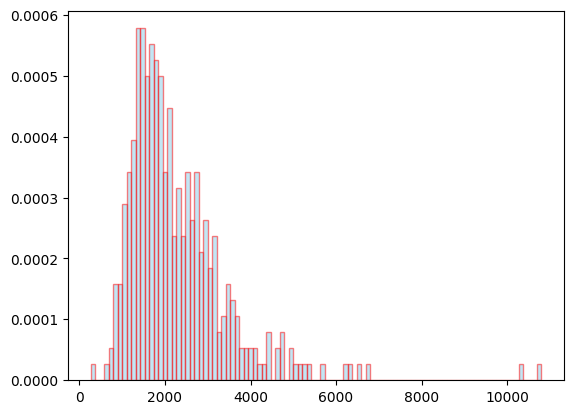

In [38]:
plt.hist(data_2023, bins=100, color='skyblue', edgecolor='red', density=True, alpha=0.5, label='Data')


In [37]:
import openturns as ot


In [ ]:
def gumbel(x, loc, scale):
    return (1/scale) * np.exp(-(x - loc)/scale) * np.exp(-np.exp(-(x - loc)/scale))

In [ ]:
from scipy.optimize import curve_fit


In [ ]:
def gumbel_distribution(t, alpha, beta):
    numerator = np.exp(-(t - alpha) / beta)
    denominator = beta * np.exp(-np.exp(-(t - alpha) / beta))
    return numerator / denominator

In [ ]:
def least_squares_cost(params, t, data):
    alpha, beta = params
    model = gumbel_distribution(t, alpha, beta)
    residuals = data - model
    return np.sum(residuals ** 2)

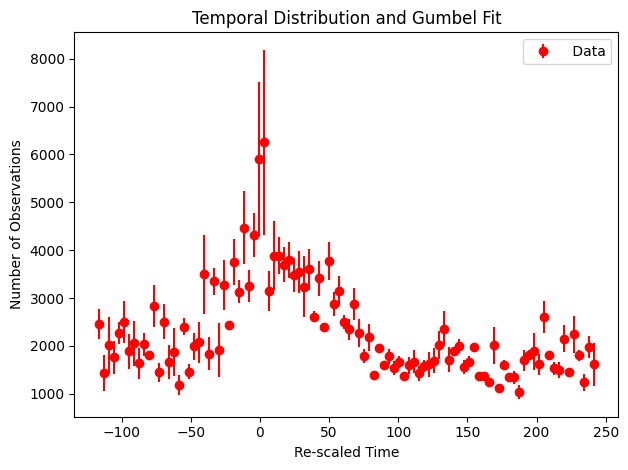

In [40]:
def plot_temporal_distribution(data):
    
    # Find the maximum peak
    max_peak_idx = np.argmax(data)
    
    # Calculate empirical average with error bars
    num_bins = 100
    bin_edges = np.linspace(-max_peak_idx, len(data) - max_peak_idx, num_bins + 1)
    bin_averages = []
    bin_errors = []
    for i in range(len(bin_edges) - 1):
        start_idx = int(bin_edges[i] + max_peak_idx)
        end_idx = int(bin_edges[i + 1] + max_peak_idx)
        bin_data = data[start_idx:end_idx]
        bin_average = np.mean(bin_data)
        bin_std_error = np.std(bin_data) / np.sqrt(len(bin_data))
        bin_averages.append(bin_average)
        bin_errors.append(bin_std_error)
    
    # Plot empirical average with error bars (red dots)
    plt.errorbar((bin_edges[:-1] + bin_edges[1:]) / 2, bin_averages, yerr=bin_errors, fmt='ro', label=' Data')
    
    plt.xlabel('Re-scaled Time')
    plt.ylabel('Number of Observations')
    plt.title('Temporal Distribution and Gumbel Fit')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage:
plot_temporal_distribution(data_t_cleaned)




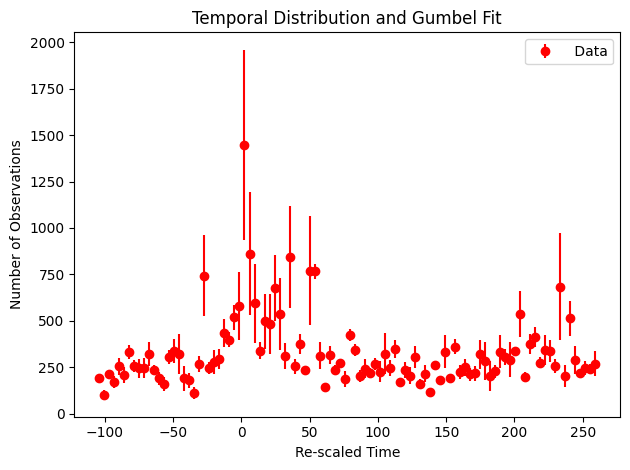

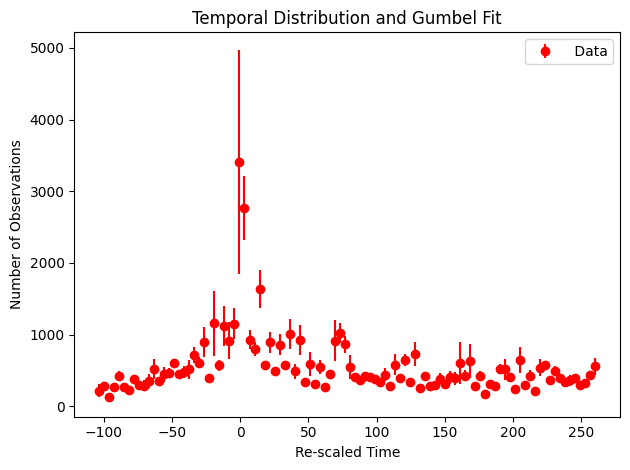

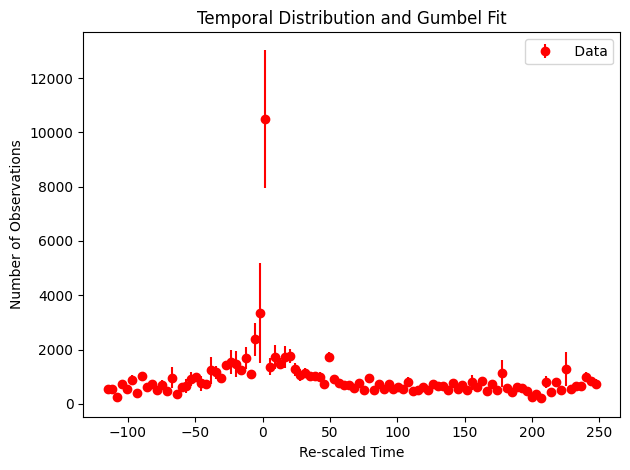

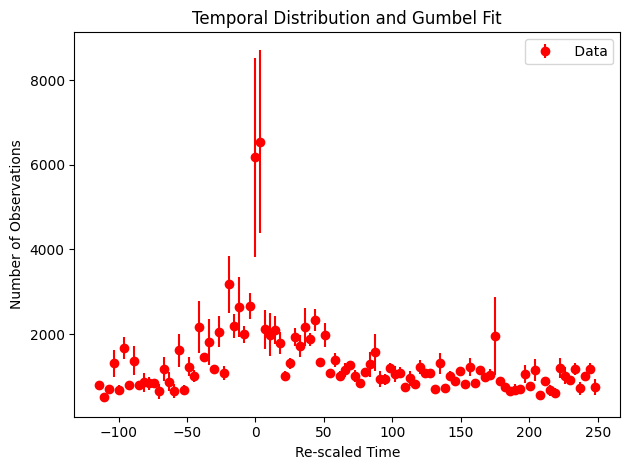

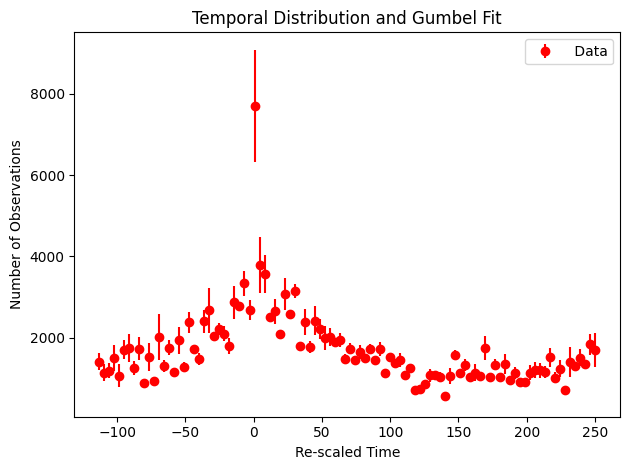

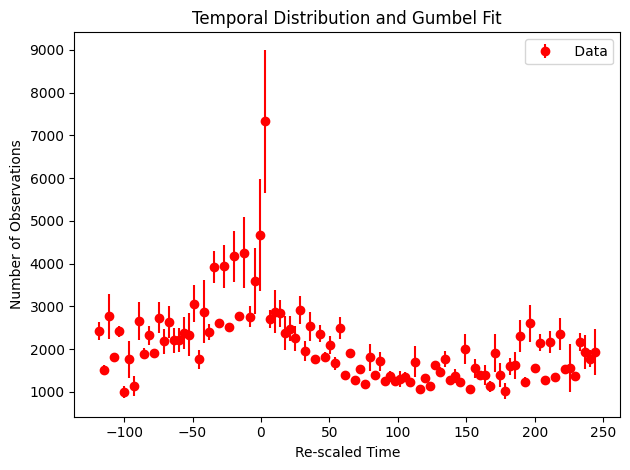

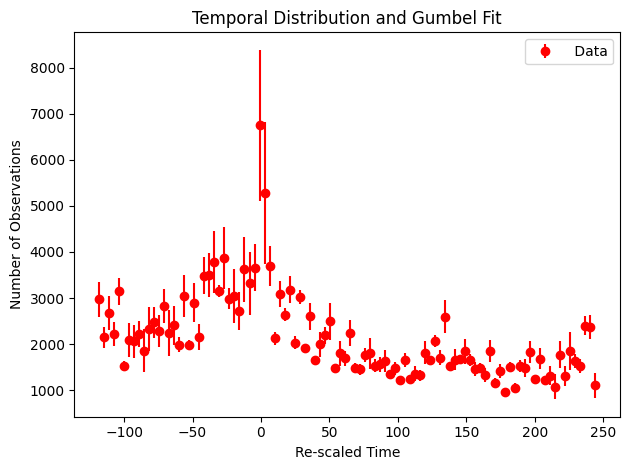

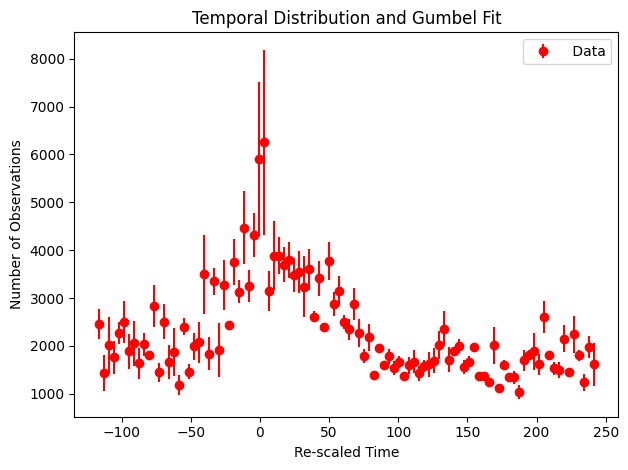

In [41]:
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    data = globals()[f'dai_ob_c_{year}']
    plot_temporal_distribution(data)

In [42]:
import scipy.stats

In [43]:
dist = scipy.stats.poisson


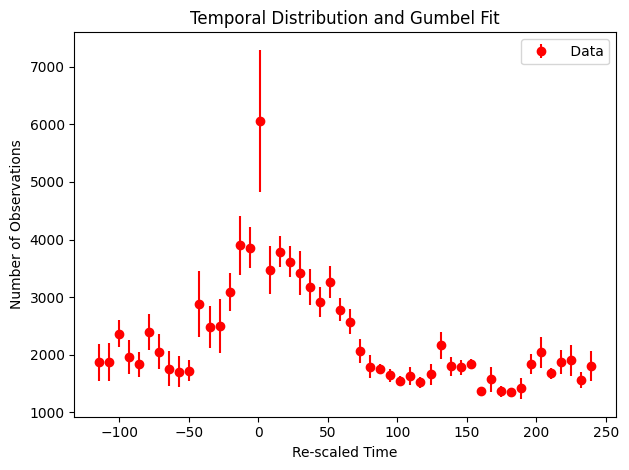

In [44]:
def plot_temporal_distribution(data):
    
    # Find the maximum peak
    max_peak_idx = np.argmax(data)
    
    # Calculate empirical average with error bars
    num_bins = 50
    bin_edges = np.linspace(-max_peak_idx, len(data) - max_peak_idx, num_bins + 1)
    bin_averages = []
    bin_errors = []
    for i in range(len(bin_edges) - 1):
        start_idx = int(bin_edges[i] + max_peak_idx)
        end_idx = int(bin_edges[i + 1] + max_peak_idx)
        bin_data = data[start_idx:end_idx]
        bin_average = np.mean(bin_data)
        bin_std_error = np.std(bin_data) / np.sqrt(len(bin_data))
        bin_averages.append(bin_average)
        bin_errors.append(bin_std_error)
    
    # Plot empirical average with error bars (red dots)
    plt.errorbar((bin_edges[:-1] + bin_edges[1:]) / 2, bin_averages, yerr=bin_errors, fmt='ro', label=' Data')

    
    plt.xlabel('Re-scaled Time')
    plt.ylabel('Number of Observations')
    plt.title('Temporal Distribution and Gumbel Fit')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage:
plot_temporal_distribution(data_t_cleaned)


## Observation per week

In [45]:
def observation_per_week(data, year):
    data_copy = data.copy()
    data_copy['time_observed_at'] = pd.to_datetime(data_copy['time_observed_at'])
    
    # Set 'time_observed_at' as the index
    data_copy.set_index('time_observed_at', inplace=True)
    
    # Resample the data to weekly frequency and calculate counts
    weekly_counts = data_copy.resample('W').size()
    
    # Reset the index to avoid issues on subsequent runs
    data_copy.reset_index(inplace=True)
    
    # Plotting
    plt.plot(weekly_counts.index, weekly_counts, label=str(year))
    
    return weekly_counts


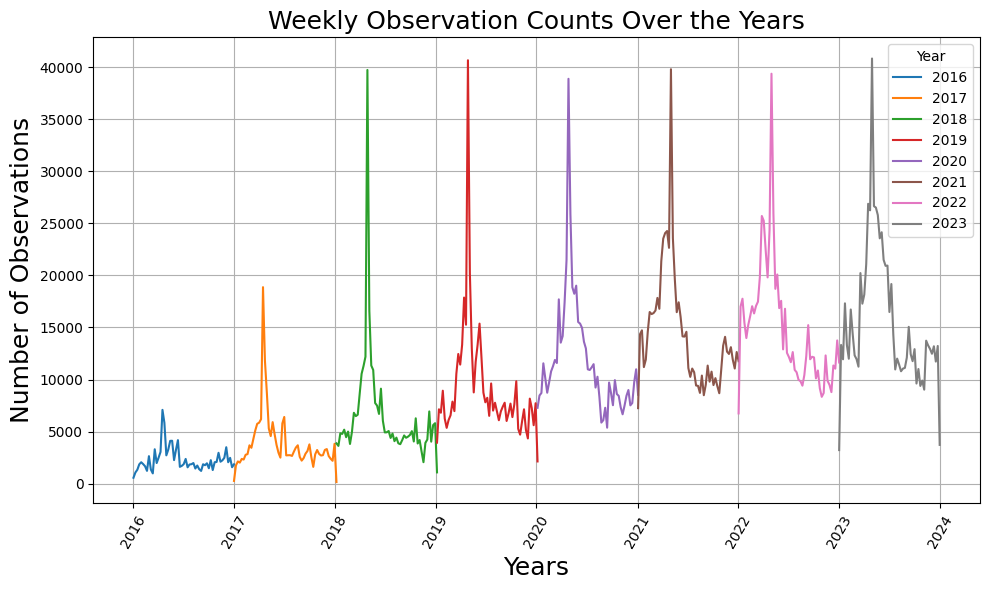

In [46]:

dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_week(df, year)

plt.title('Weekly Observation Counts Over the Years', fontsize=18)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of Observations', fontsize=18)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

# Set x-axis ticks to week numbers
plt.xticks(rotation=60)


plt.tight_layout()
plt.show()

In [47]:
from scipy.interpolate import interp1d

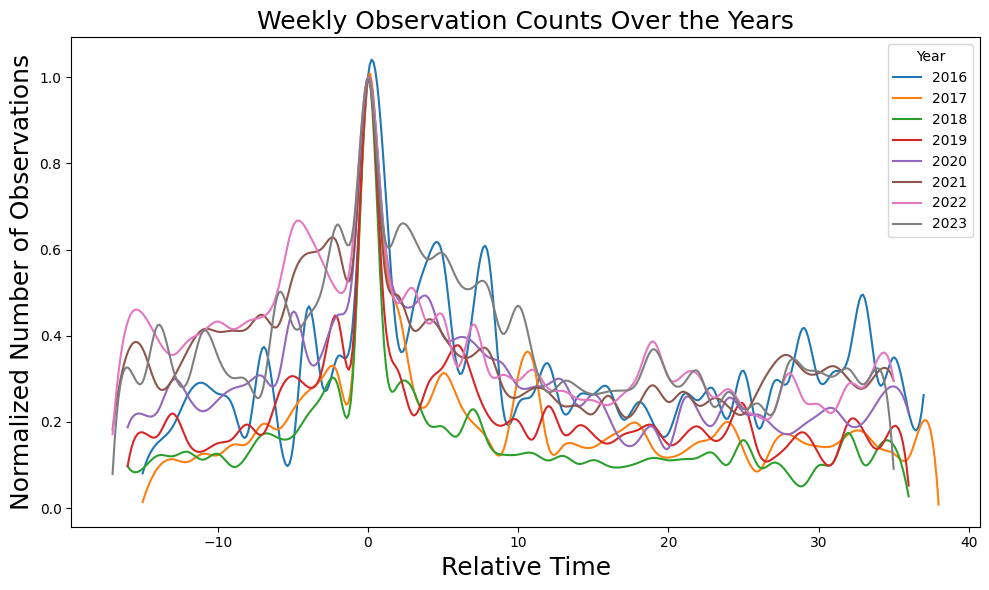

In [48]:
def observation_per_week_rs(data, year):
    data_copy = data.copy()
    data_copy['time_observed_at'] = pd.to_datetime(data_copy['time_observed_at'])
    
    # Set 'time_observed_at' as the index
    data_copy.set_index('time_observed_at', inplace=True)
    
    # Resample the data to weekly frequency and calculate counts
    weekly_counts = data_copy.resample('W').size()
    
    # Reset the index to avoid issues on subsequent runs
    data_copy.reset_index(inplace=True)
    
    # Find the maximum peak
    max_peak_week = weekly_counts.idxmax()
    max_peak_value = weekly_counts[max_peak_week]
    
    # Print peak values
    #print(f"Peak Week for {year}: {max_peak_week}")
    #print(f"Peak Value for {year}: {max_peak_value}")
    
    # Shift x-axis such that max peak is at 0
    x_values = (weekly_counts.index - max_peak_week).days / 7
    
    # Normalize counts
    normalized_counts = weekly_counts / max_peak_value
    
    # Print normalized peak value
    #print(f"Normalized Peak Value for {year}: {normalized_counts.max()}")  
    
    # Interpolate the data for smooth curve
    f = interp1d(x_values, normalized_counts, kind='cubic')  # 'cubic' for cubic spline interpolation
        
    # Generate new x values 
    x_smooth = np.linspace(min(x_values), max(x_values), 400)  # Adjust the number of points as needed
    #print(f"interpolate smooth data {year}: {x_smooth}")

    # Plot the smoothed curve
    plt.plot(x_smooth, f(x_smooth), label=f'{year}')
    
    
     # Plotting
    #plt.plot(x_values, normalized_counts, label=str(year))
    #plt.scatter(x_values, normalized_counts, label=str(year))
    #plt.scatter(x_values, normalized_counts, s=3, label=str(year))
    #plt.plot(x_values, normalized_counts, linestyle='-', alpha=0.5)  # Plotting the curve
    
    return weekly_counts


dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_week_rs(df, year)

plt.title('Weekly Observation Counts Over the Years', fontsize=18)
plt.xlabel('Relative Time', fontsize=18)
plt.ylabel('Normalized Number of Observations', fontsize=18)
plt.legend(title='Year', loc='upper right')
#plt.grid(True)

plt.tight_layout()
plt.show()


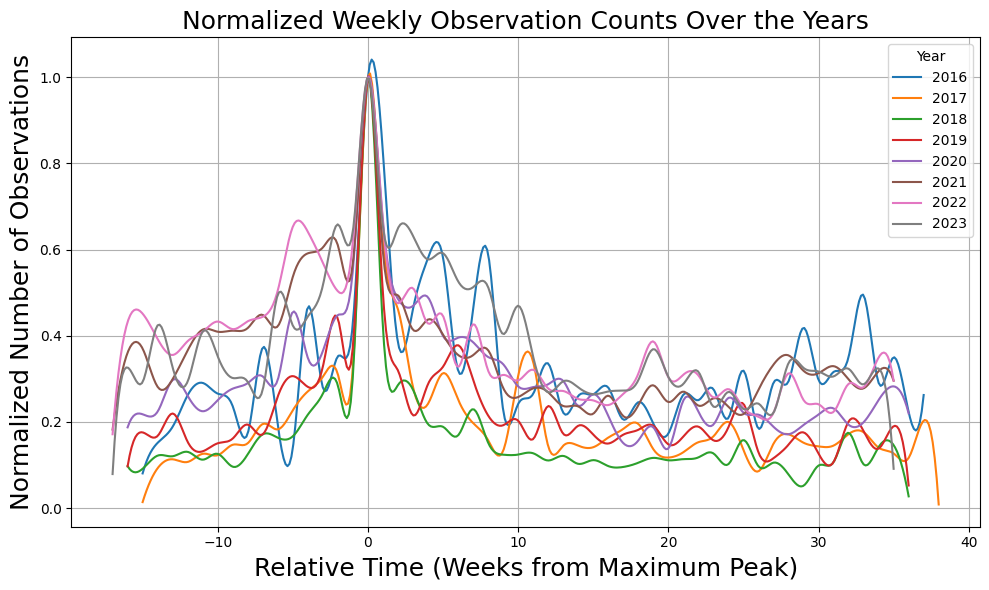

In [49]:
#with average 
def observation_per_week_a(data, year):
    data_copy = data.copy()
    data_copy['time_observed_at'] = pd.to_datetime(data_copy['time_observed_at'])
    
    # Set 'time_observed_at' as the index
    data_copy.set_index('time_observed_at', inplace=True)
    
    # Resample the data to weekly frequency and calculate counts
    weekly_counts = data_copy.resample('W').size()
    
    # average number of observations per week
    average_observations_per_week = weekly_counts.mean()
    
    # Find the maximum peak
    max_peak_week = weekly_counts.idxmax()
    max_peak_value = weekly_counts[max_peak_week]
    
    # Shift x-axis such that max peak is at 0
    x_values = (weekly_counts.index - max_peak_week).days / 7
    
    # Normalize counts
    normalized_counts = weekly_counts / max_peak_value
    
    # Interpolate the data for smooth curve
    f = interp1d(x_values, normalized_counts, kind='cubic') 
    
    # Generate new x values for smooth curve
    x_smooth = np.linspace(min(x_values), max(x_values), 400)  
    
    # Plot the smoothed curve
    plt.plot(x_smooth, f(x_smooth), label=f'{year}')
    
    return average_observations_per_week


dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot 
for df, year in zip(dataframes, years):
    observation_per_week_a(df, year)

plt.title('Normalized Weekly Observation Counts Over the Years', fontsize=18)
plt.xlabel('Relative Time (Weeks from Maximum Peak)', fontsize=18)
plt.ylabel('Normalized Number of Observations', fontsize=18)
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Perform Kruskal 

In [50]:
from scipy.stats import kruskal

Kruskal-Wallis Test Results:
Statistic: 7.0
P-value: 0.42887985755305486
The Kruskal-Wallis test fails to reject the null hypothesis. There is no significant difference.


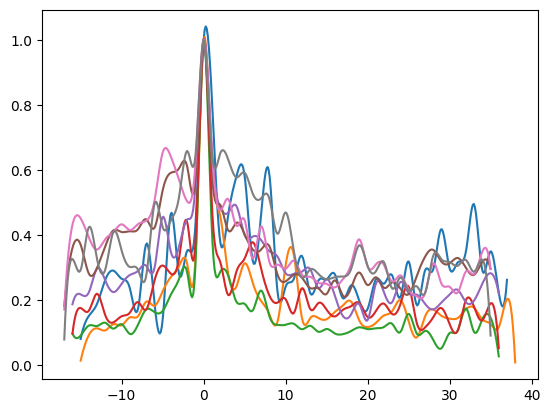

In [51]:
# Lists to store maximum peak values for each year
max_peak_values = []


for df, year in zip(dataframes, years):
    weekly_counts = observation_per_week_a(df, year)
    # Get the maximum peak value
    max_peak_value = weekly_counts.max()  
    # Append to the list
    max_peak_values.append(max_peak_value)  

# Kruskal-Wallis test
statistic, p_value = kruskal(*max_peak_values)  #peak values for all years

# Print results
print("Kruskal-Wallis Test Results:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# results
alpha = 0.05  # significance level
if p_value < alpha:
    print("The Kruskal-Wallis test rejects the null hypothesis.")
else:
    print("The Kruskal-Wallis test fails to reject the null hypothesis. There is no significant difference.")


2024-03-27 15:23:49.184 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=8e-06)
2024-03-27 15:23:49.197 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-05)
2024-03-27 15:23:49.199 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=5e-06)


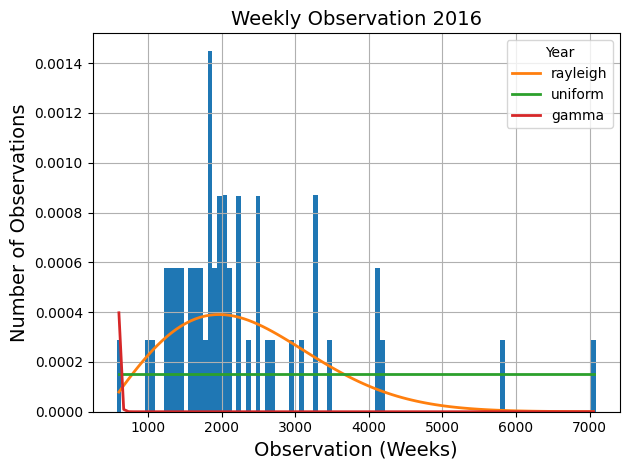

2024-03-27 15:23:49.384 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-03-27 15:23:49.406 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=2e-06)
2024-03-27 15:23:49.407 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)


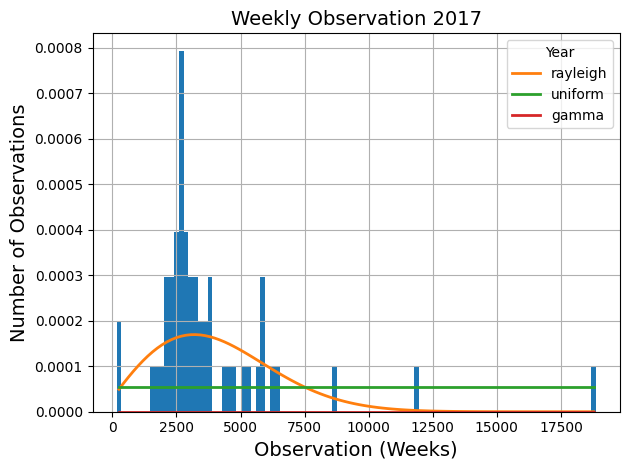

2024-03-27 15:23:49.590 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:23:49.596 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-03-27 15:23:49.616 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


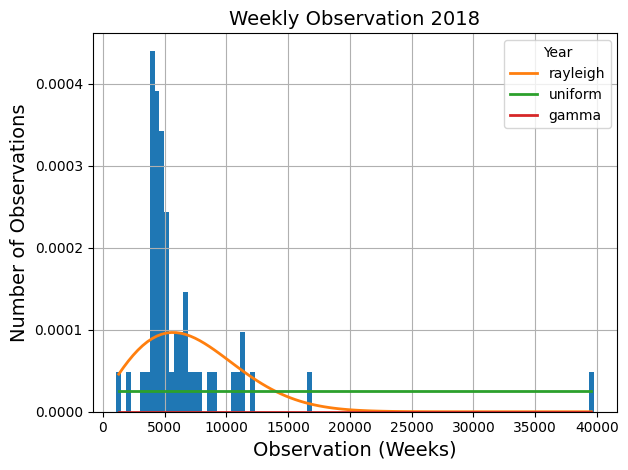

2024-03-27 15:23:49.906 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:23:49.917 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-27 15:23:49.919 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)


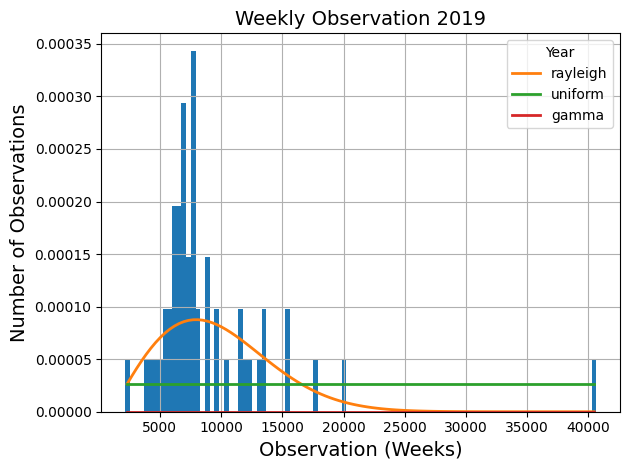

2024-03-27 15:23:50.083 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:23:50.115 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-27 15:23:50.117 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)


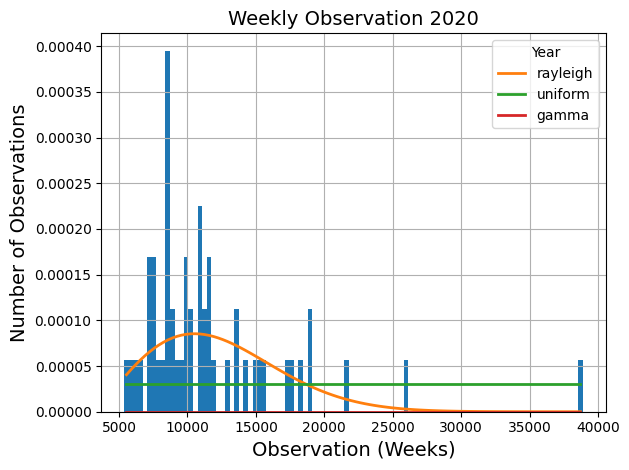

2024-03-27 15:23:50.287 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:23:50.309 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-27 15:23:50.311 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)


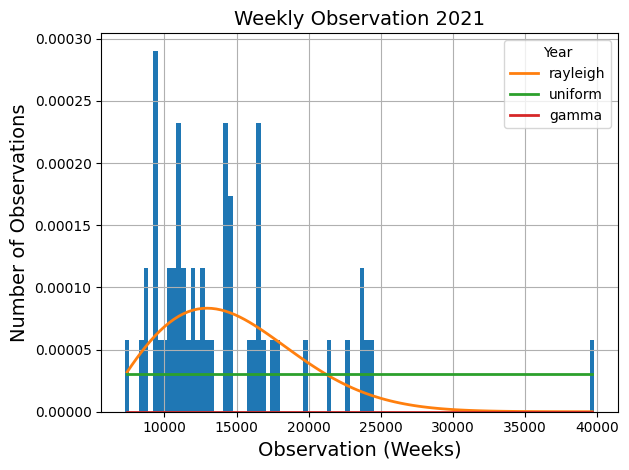

2024-03-27 15:23:50.481 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:23:50.496 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:23:50.513 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


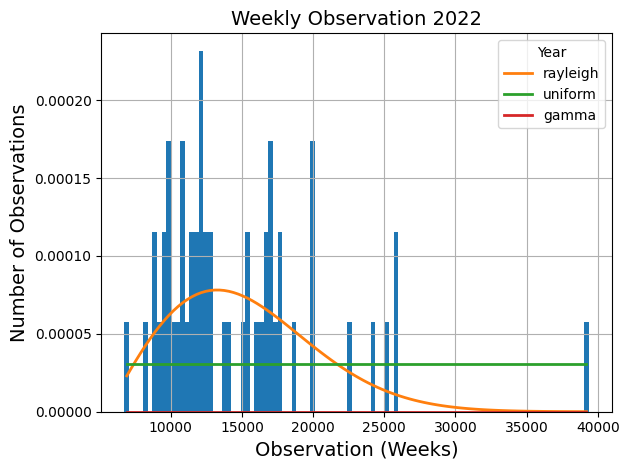

2024-03-27 15:23:50.685 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:23:50.695 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-27 15:23:50.696 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)


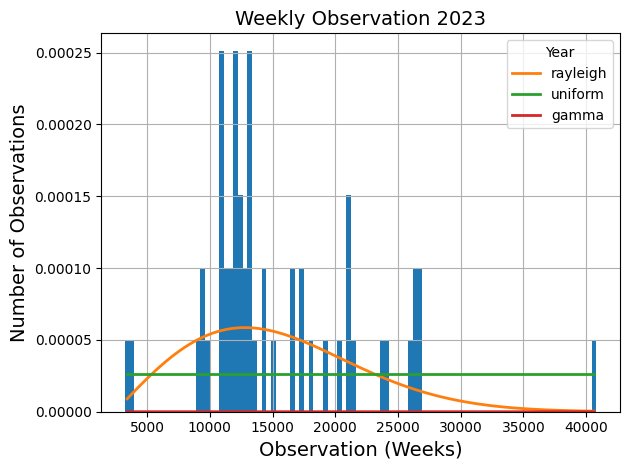

In [52]:
wk_ob_2016 = observation_per_week(sf_2016,2016)
wk_ob_2017 = observation_per_week(sf_2017,2017)
wk_ob_2018 = observation_per_week(sf_2018,2018)
wk_ob_2019 = observation_per_week(sf_2019,2019)
wk_ob_2020 = observation_per_week(sf_2020,2020)
wk_ob_2021 = observation_per_week(sf_2021,2021)
wk_ob_2022 = observation_per_week(sf_2022,2022)
wk_ob_2023 = observation_per_week(sf_2023,2023)

wk_ob_c_2016 = wk_ob_2016.dropna().values
wk_ob_c_2017 = wk_ob_2017.dropna().values
wk_ob_c_2018 = wk_ob_2018.dropna().values
wk_ob_c_2019 = wk_ob_2019.dropna().values
wk_ob_c_2020 = wk_ob_2020.dropna().values
wk_ob_c_2021 = wk_ob_2021.dropna().values
wk_ob_c_2022 = wk_ob_2022.dropna().values
wk_ob_c_2023 = wk_ob_2023.dropna().values

#Method 2 : this is efficient than the one i did up

#define a function
def fit_and_plot_distribution(data, year):
    # Fit the distribution using Fitter
    f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform'])
    f.fit()
    f.summary()

    plt.title(f'Weekly Observation {year}', fontsize=14)
    plt.xlabel('Observation (Weeks)', fontsize=14)
    plt.ylabel('Number of Observations', fontsize=14)
    plt.legend(title='Year', loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    data = globals()[f'wk_ob_c_{year}']
    fit_and_plot_distribution(data, year)



2024-03-27 15:24:36.649 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=8e-06)
2024-03-27 15:24:36.688 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-05)
2024-03-27 15:24:36.690 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=5e-06)
2024-03-27 15:24:36.690 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=7e-06)


          sumsquare_error           aic           bic  kl_div  ks_statistic  \
rayleigh         0.000005   1994.618041   1998.558625     inf      0.172896   
expon            0.000007   1873.493112   1877.433695     inf      0.260935   
uniform          0.000008   1760.433885   1764.374469     inf      0.467274   
gamma            0.000010  29283.113550  29289.024425     inf      0.981132   

             ks_pvalue  
rayleigh  7.430722e-02  
expon     1.132513e-03  
uniform   3.964414e-11  
gamma     8.211245e-92  


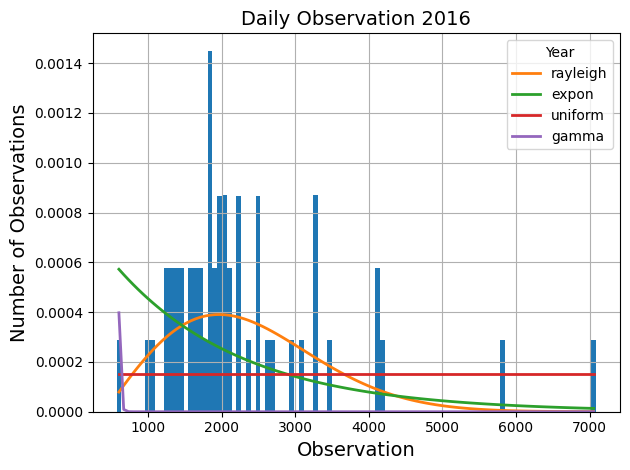

2024-03-27 15:24:36.926 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-03-27 15:24:36.929 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1e-06)
2024-03-27 15:24:36.968 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=2e-06)
2024-03-27 15:24:36.970 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)


          sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh     8.737701e-07    2476.620316    2480.598284     inf      0.240046   
expon        1.184073e-06    2155.752486    2159.730454     inf      0.324414   
uniform      1.438498e-06    1971.362684    1975.340652     inf      0.610452   
gamma        1.724160e-06  549958.887705  549964.854657     inf      0.981481   

             ks_pvalue  
rayleigh  3.187878e-03  
expon     1.468809e-05  
uniform   7.462977e-20  
gamma     5.646339e-94  


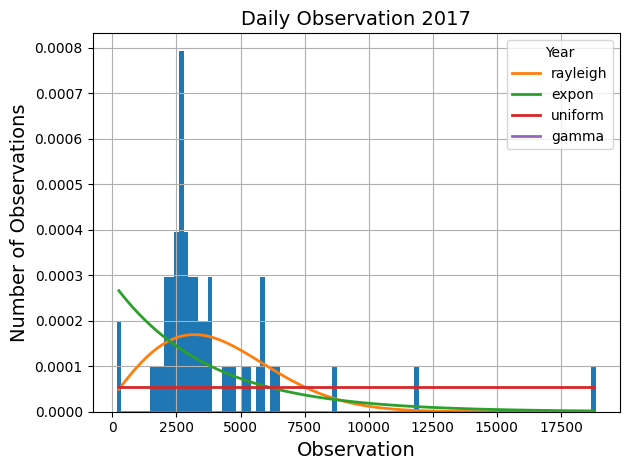

2024-03-27 15:24:37.366 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-03-27 15:24:37.368 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:24:37.370 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-03-27 15:24:37.400 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


          sumsquare_error           aic           bic  kl_div  ks_statistic  \
rayleigh     3.578574e-07  2.990627e+03  2.994568e+03     inf      0.277566   
expon        4.154452e-07  2.441929e+03  2.445870e+03     inf      0.320987   
uniform      5.410659e-07  2.116403e+03  2.120344e+03     inf      0.677861   
gamma        6.080463e-07  1.257875e+06  1.257881e+06     inf      0.981132   

             ks_pvalue  
rayleigh  4.211198e-04  
expon     2.334666e-05  
uniform   1.199373e-24  
gamma     8.211243e-92  


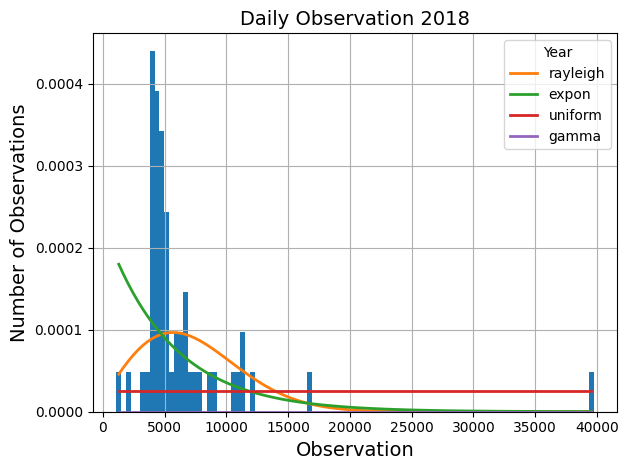

2024-03-27 15:24:37.611 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:24:37.612 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-03-27 15:24:37.642 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-27 15:24:37.646 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)


          sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh     2.102167e-07    2726.287732    2730.228315     inf      0.241173   
expon        2.795368e-07    2328.405289    2332.345873     inf      0.276688   
uniform      3.524374e-07    2115.796957    2119.737541     inf      0.614658   
gamma        4.198253e-07  694845.092248  694851.003124     inf      0.981132   

             ks_pvalue  
rayleigh  3.375601e-03  
expon     4.444139e-04  
uniform   8.616833e-20  
gamma     8.211243e-92  


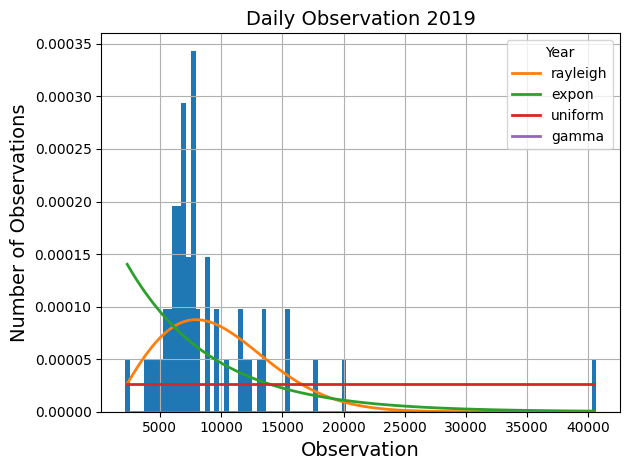

2024-03-27 15:24:37.865 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:24:37.896 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-27 15:24:37.897 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-03-27 15:24:37.898 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)


          sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh     2.319372e-07    2501.196238    2505.136822     inf      0.213591   
expon        2.454470e-07    2283.092118    2287.032702     inf      0.184279   
uniform      3.582143e-07    2087.848203    2091.788787     inf      0.546143   
gamma        4.473316e-07  827535.847412  827541.758288     inf      0.981132   

             ks_pvalue  
rayleigh  1.334950e-02  
expon     4.770720e-02  
uniform   2.353554e-15  
gamma     8.211243e-92  


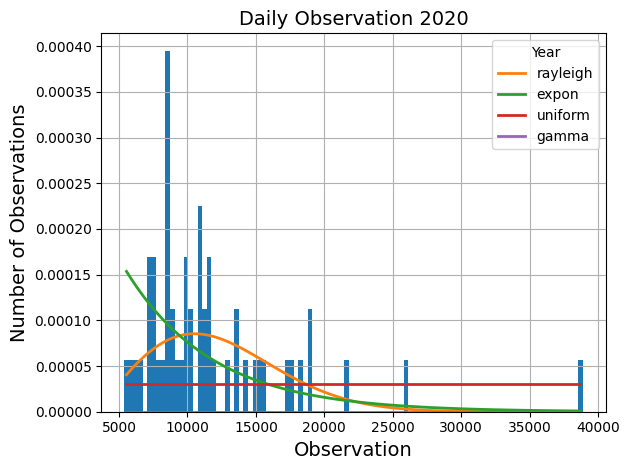

2024-03-27 15:24:38.122 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:24:38.136 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-27 15:24:38.139 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-03-27 15:24:38.140 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)


          sumsquare_error           aic           bic  kl_div  ks_statistic  \
rayleigh     2.312661e-07  2.410971e+03  2.414912e+03     inf      0.145965   
expon        2.550074e-07  2.237440e+03  2.241381e+03     inf      0.182808   
uniform      3.392089e-07  2.082064e+03  2.086004e+03     inf      0.523825   
gamma        4.336335e-07  1.045606e+06  1.045612e+06     inf      0.981132   

             ks_pvalue  
rayleigh  1.891890e-01  
expon     5.059976e-02  
uniform   4.536056e-14  
gamma     8.211243e-92  


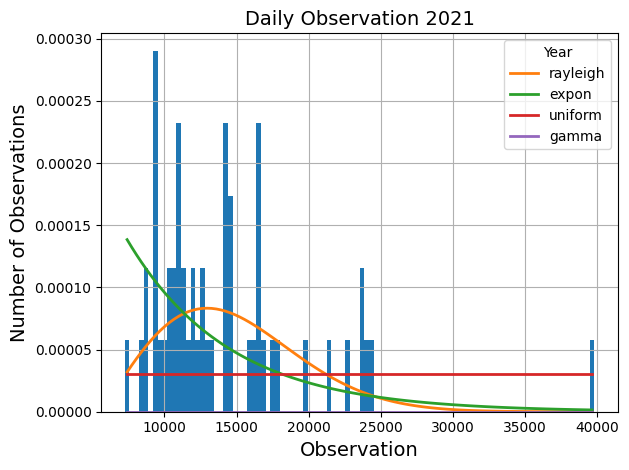

2024-03-27 15:24:38.350 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:24:38.381 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-27 15:24:38.383 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-03-27 15:24:38.384 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)


          sumsquare_error           aic           bic  kl_div  ks_statistic  \
rayleigh     1.781047e-07  2.334423e+03  2.338364e+03     inf      0.164737   
expon        2.182552e-07  2.207354e+03  2.211295e+03     inf      0.186813   
uniform      2.707462e-07  2.082518e+03  2.086458e+03     inf      0.477865   
gamma        3.647428e-07  1.002509e+06  1.002515e+06     inf      0.981132   

             ks_pvalue  
rayleigh  1.003084e-01  
expon     4.305749e-02  
uniform   1.202557e-11  
gamma     8.211243e-92  


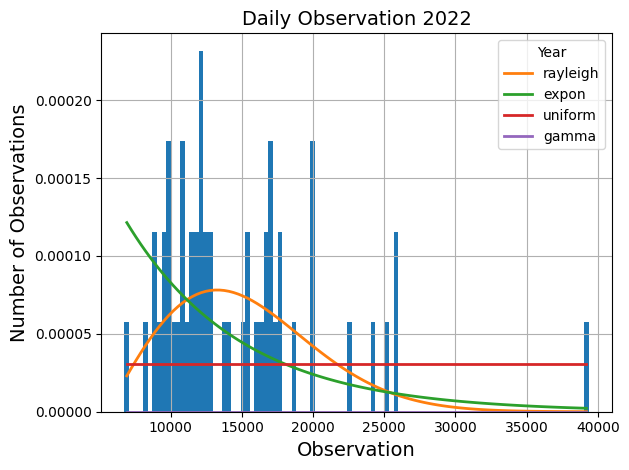

2024-03-27 15:24:38.690 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-27 15:24:38.690 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:24:38.691 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-03-27 15:24:38.694 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)


          sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh     2.293757e-07    2242.143376    2246.083960     inf      0.164247   
expon        2.889708e-07    2193.075767    2197.016351     inf      0.346085   
uniform      2.893854e-07    2110.941227    2114.881811     inf      0.363180   
gamma        3.601260e-07  259498.705888  259504.616764     inf      0.981132   

             ks_pvalue  
rayleigh  1.020865e-01  
expon     3.557940e-06  
uniform   9.024885e-07  
gamma     8.211243e-92  


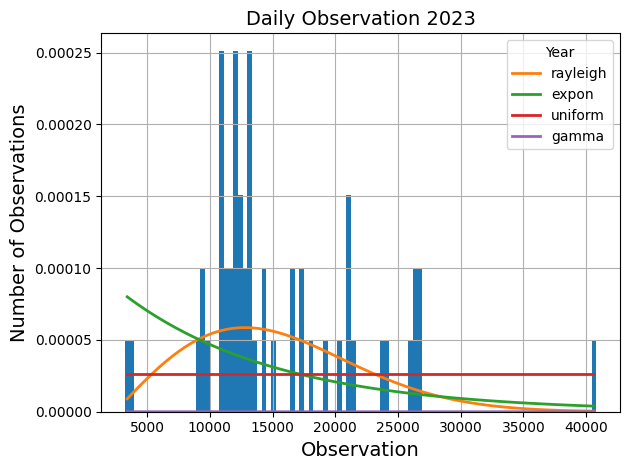

In [53]:
def fit_and_plot_distribution(data, year):
    # Fit the distribution using Fitter
    f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform','expon'])
    f.fit()
    f.summary()
    
    # Summary table
    summary_table = f.summary()

    # Print summary table
    print(summary_table)

    plt.title(f'Daily Observation {year}', fontsize=14)
    plt.xlabel('Observation', fontsize=14)
    plt.ylabel('Number of Observations', fontsize=14)
    plt.legend(title='Year', loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    data = globals()[f'wk_ob_c_{year}']
    fit_and_plot_distribution(data, year)
    


In [58]:
def total_counts_per_week(dataframes, years):
    # Function to calculate total counts per week
    wk_ob_dataframes = [observation_per_week(df, year) for df, year in zip(dataframes, years)]
    all_years_df = pd.concat(wk_ob_dataframes)
    total_counts_per_week = all_years_df.sum()
    return total_counts_per_week


## Observations per month 

In [86]:
def observation_per_month(data, year):
    # Extract month from 'time_observed_at'
    data['month'] = data['time_observed_at'].dt.month
    # Group by 'month' and calculate counts
    monthly_counts = data.groupby('month').size()
    # Def month names
    month_names = [calendar.month_abbr[i] for i in range(1, 13)]
    # Plotting
    plt.plot(monthly_counts.index, monthly_counts, label=str(year))
    return monthly_counts

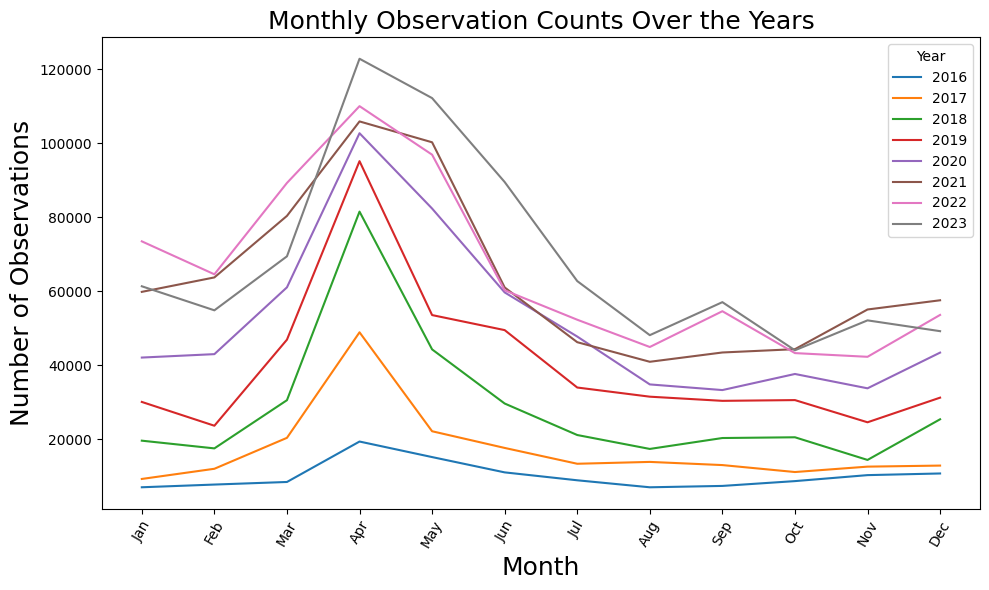

In [87]:
# Dataframes and years
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_month(df, year)

plt.title('Monthly Observation Counts Over the Years', fontsize = 18)
plt.xlabel('Month',fontsize = 18)
plt.ylabel('Number of Observations',fontsize = 18)
plt.legend(title='Year', loc='upper right')
#plt.grid(True)

# Set x-axis ticks to month names
plt.xticks(range(1, 13), labels=calendar.month_abbr[1:], rotation=60)

plt.tight_layout()
plt.show()


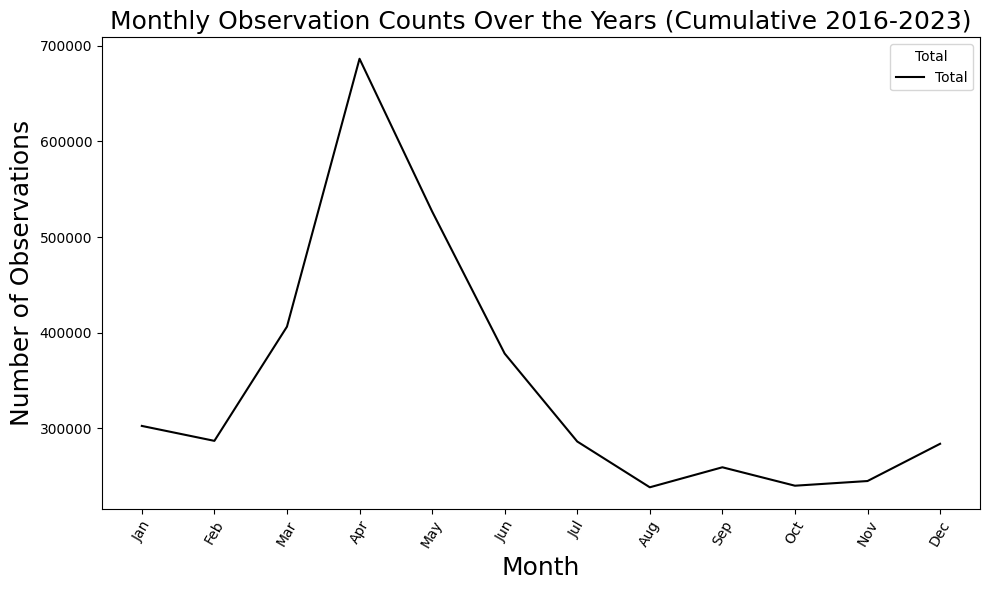

In [70]:
def observation_per_month(data, year):
    # Extract month from 'time_observed_at'
    data['month'] = data['time_observed_at'].dt.month
    # Group by 'month' and calculate counts
    monthly_counts = data.groupby('month').size()
    # Def month names
    month_names = [calendar.month_abbr[i] for i in range(1, 13)]
    return monthly_counts

# Dataframes and years
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# count total counts across all years
total_counts = None
for df, year in zip(dataframes, years):
    monthly_counts = observation_per_month(df, year)
    if total_counts is None:
        total_counts = monthly_counts
    else:
        total_counts += monthly_counts

# Plot total cumulative counts
plt.plot(total_counts.index, total_counts, label='Total', linestyle='-', color='black')


plt.title('Monthly Observation Counts Over the Years (Cumulative 2016-2023)' , fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Number of Observations', fontsize=18)
plt.legend(title='Total', loc='upper right')
plt.xticks(range(1, 13), labels=calendar.month_abbr[1:], rotation=60)

plt.tight_layout()
plt.show()


In [76]:
total_counts


month
1.0     302422
2.0     286798
3.0     406225
4.0     686454
5.0     526799
6.0     378106
7.0     286118
8.0     238231
9.0     259164
10.0    239885
11.0    244777
12.0    283728
dtype: int64

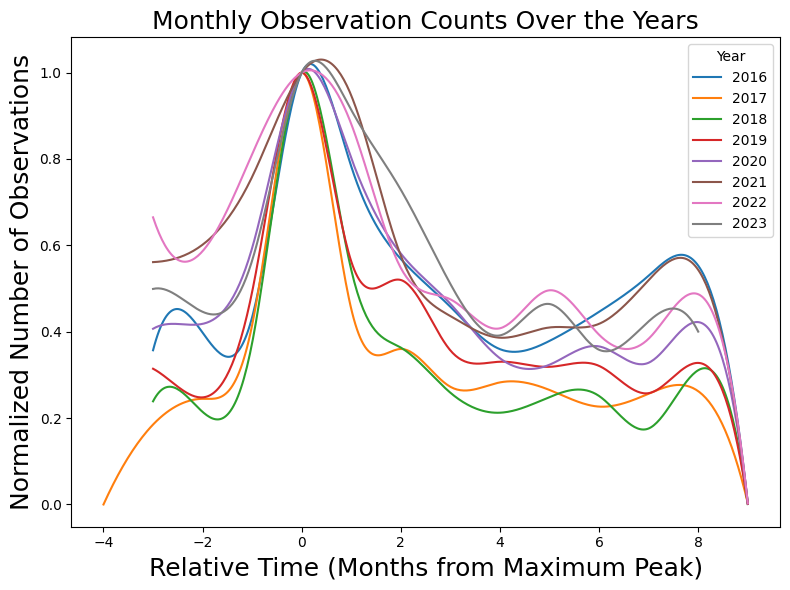

In [77]:
def observation_per_month_rs(data, year):
    data_copy = data.copy() # Create a copy of the DataFrame
    data_copy['time_observed_at'] = pd.to_datetime(data_copy['time_observed_at'])
    
    # set 'time_observed_at' as the index
    data_copy.set_index('time_observed_at', inplace=True)
    
    # count daily counts 
    monthly_counts = data_copy.resample('M').size()
    
    # Reset the index to avoid issues on subsequent runs
    data_copy.reset_index(inplace=True)
    
    # Find the maximum peak
    max_peak_month = monthly_counts.idxmax()
    max_peak_value = monthly_counts.max()  # Corrected line
    
    # Shift x-axis such that max peak is at 0
    x_values = (monthly_counts.index.month - max_peak_month.month) + (monthly_counts.index.year - max_peak_month.year) * 12
    
    # Normalize counts
    normalized_counts = monthly_counts / max_peak_value
    
    # Print normalized peak value
    #print(f"Normalized Peak Value for {year}: {normalized_counts.max()}")  
    
    # Interpolate the data for smooth curve
    f = interp1d(x_values, normalized_counts, kind='cubic')  # 'cubic' for cubic spline interpolation
        
    # Generate new x values 
    x_smooth = np.linspace(min(x_values), max(x_values), 400)  
    
    # Plot the smoothed curve
    return x_smooth, f(x_smooth)

dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(8, 6))

# Plot
for df, year in zip(dataframes, years):
    x_smooth, y_smooth = observation_per_month_rs(df, year)
    plt.plot(x_smooth, y_smooth, label=f'{year}')

plt.title('Monthly Observation Counts Over the Years', fontsize=18)
plt.xlabel('Relative Time (Months from Maximum Peak)', fontsize=18)  # Changed label
plt.ylabel('Normalized Number of Observations', fontsize=18)
plt.legend(title='Year', loc='upper right')
#plt.grid(True)

plt.tight_layout()
plt.show()


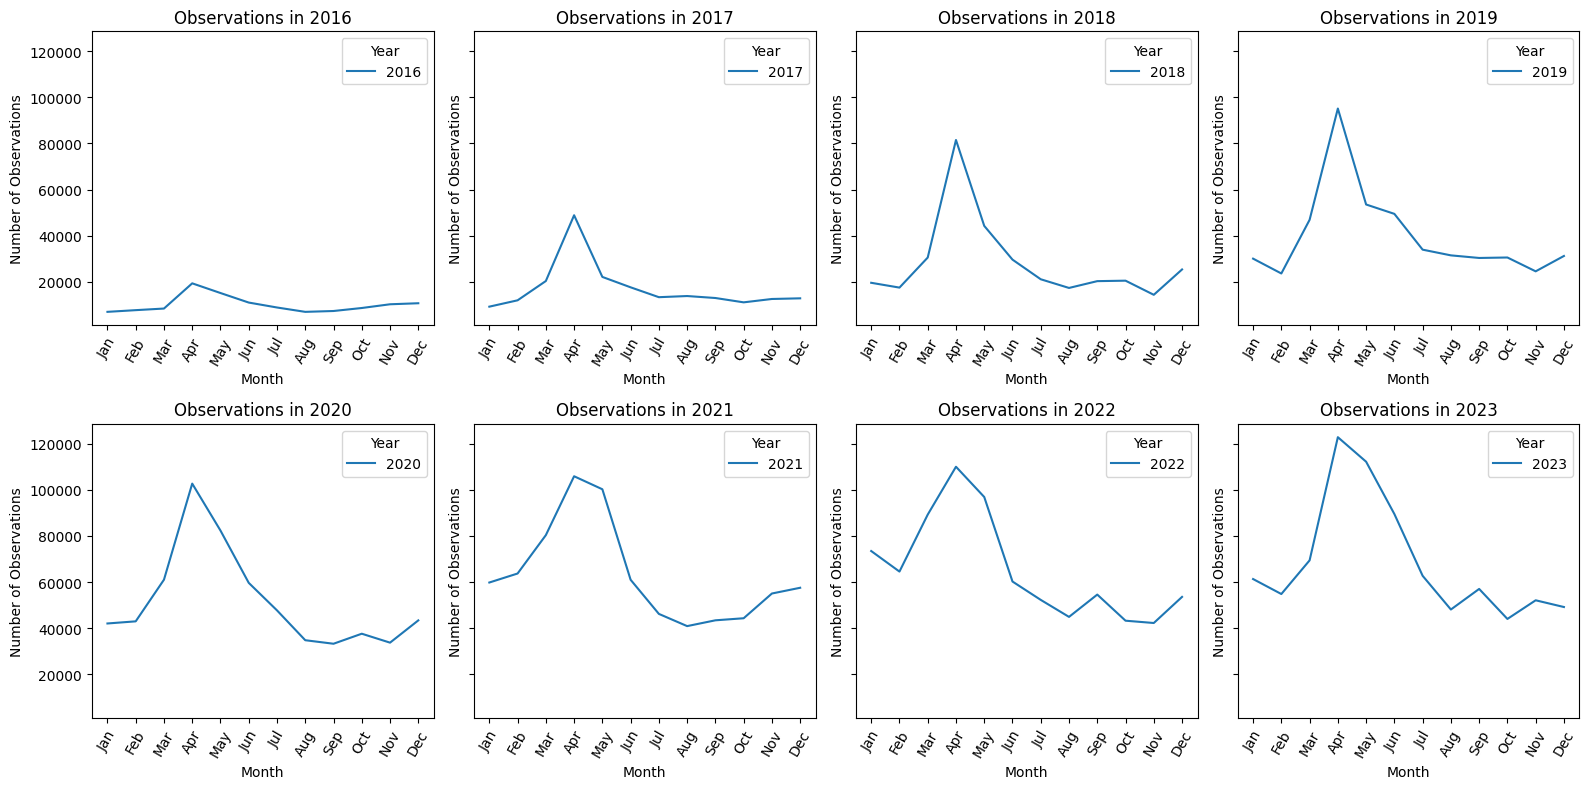

In [88]:
# Dataframes and years
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Create separate subplots for each year
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey=True)
axes = axes.flatten()

# Plotting
for i, (df, year) in enumerate(zip(dataframes, years)):
    plt.sca(axes[i])
    observation_per_month(df, year)
    
    plt.title(f'Observations in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Observations')
    plt.legend(title='Year', loc='upper right')
    plt.xticks(range(1, 13), labels=calendar.month_abbr[1:], rotation=60)

plt.tight_layout()
plt.show()


2024-03-27 15:51:29.548 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6e-06)
2024-03-27 15:51:29.556 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=5e-06)
2024-03-27 15:51:29.572 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4e-06)


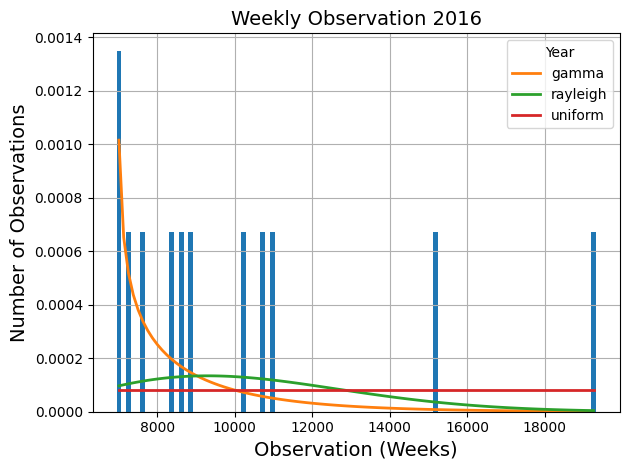

2024-03-27 15:51:29.740 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-03-27 15:51:29.748 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:51:29.770 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


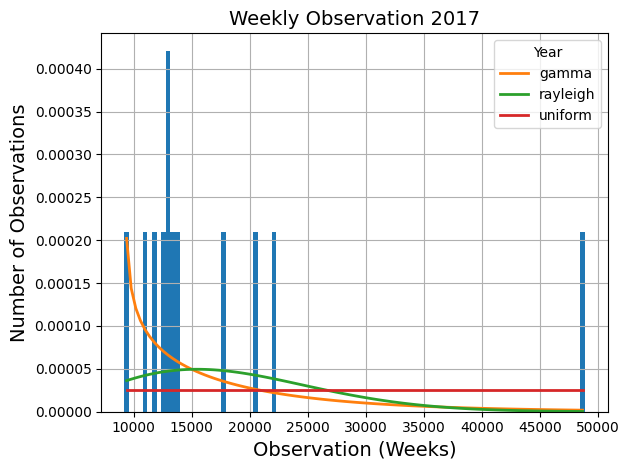

2024-03-27 15:51:29.959 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:51:29.964 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:51:29.987 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


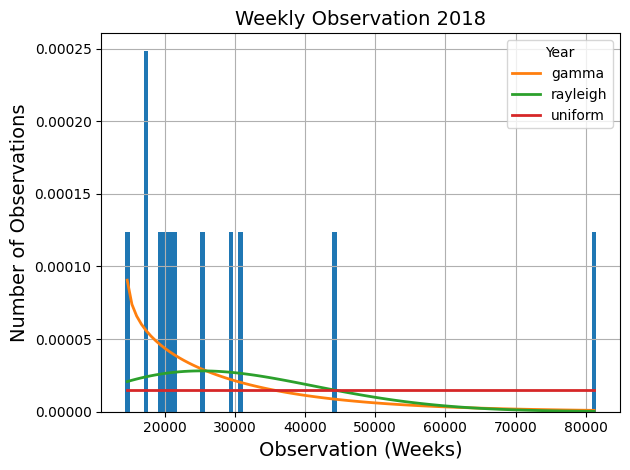

2024-03-27 15:51:30.172 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:51:30.184 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:51:30.195 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


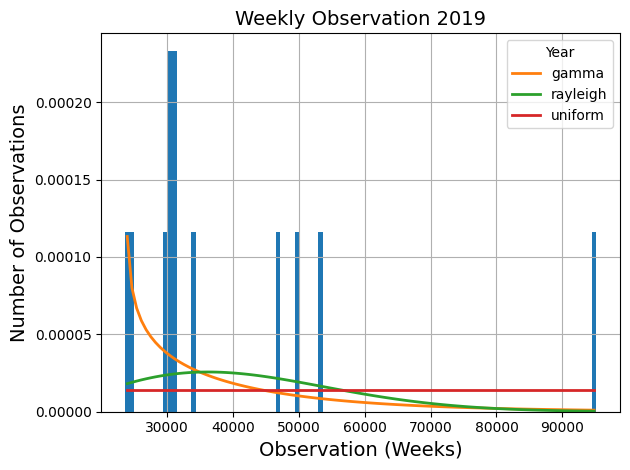

2024-03-27 15:51:30.384 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:51:30.385 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:51:30.392 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


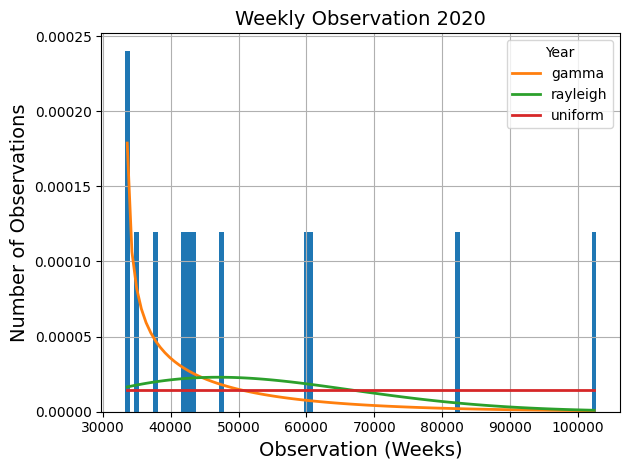

2024-03-27 15:51:30.548 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:51:30.573 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:51:30.578 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


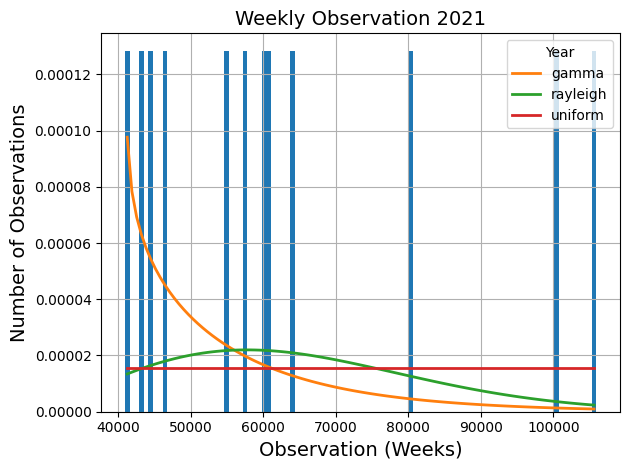

2024-03-27 15:51:30.740 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:51:30.755 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:51:30.770 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


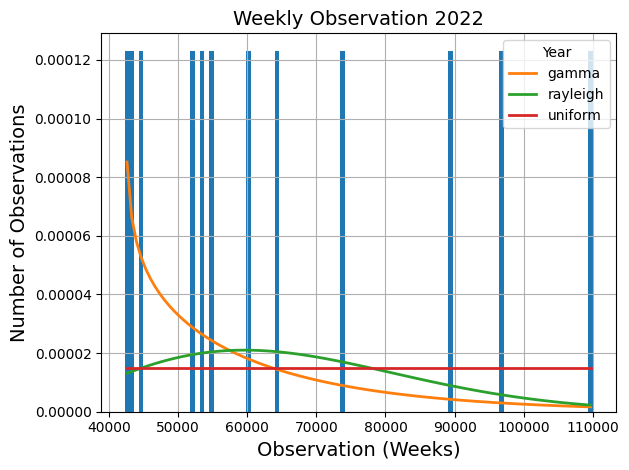

2024-03-27 15:51:30.958 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:51:30.960 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:51:30.960 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


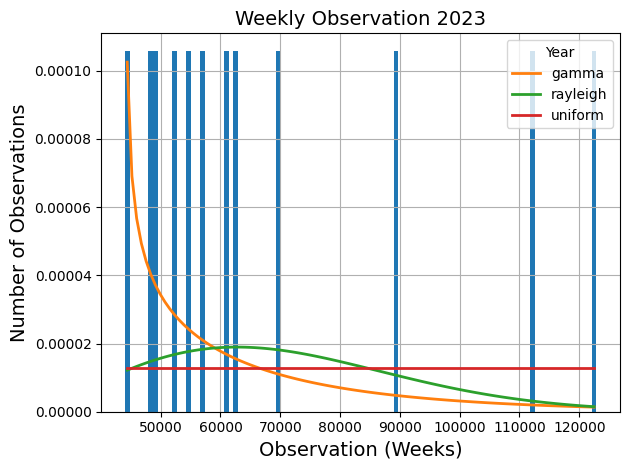

In [79]:
mo_ob_2016 = observation_per_month(sf_2016,2016)
mo_ob_2017 = observation_per_month(sf_2017,2017)
mo_ob_2018 = observation_per_month(sf_2018,2018)
mo_ob_2019 = observation_per_month(sf_2019,2019)
mo_ob_2020 = observation_per_month(sf_2020,2020)
mo_ob_2021 = observation_per_month(sf_2021,2021)
mo_ob_2022 = observation_per_month(sf_2022,2022)
mo_ob_2023 = observation_per_month(sf_2023,2023)

mo_ob_c_2016 = mo_ob_2016.dropna().values
mo_ob_c_2017 = mo_ob_2017.dropna().values
mo_ob_c_2018 = mo_ob_2018.dropna().values
mo_ob_c_2019 = mo_ob_2019.dropna().values
mo_ob_c_2020 = mo_ob_2020.dropna().values
mo_ob_c_2021 = mo_ob_2021.dropna().values
mo_ob_c_2022 = mo_ob_2022.dropna().values
mo_ob_c_2023 = mo_ob_2023.dropna().values

#Method 2 : this is efficient than the one i did up

#define a function
def fit_and_plot_distribution(data, year):
    # Fit the distribution using Fitter
    f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform'])
    f.fit()
    f.summary()

    plt.title(f'Weekly Observation {year}', fontsize=14)
    plt.xlabel('Observation (Weeks)', fontsize=14)
    plt.ylabel('Number of Observations', fontsize=14)
    plt.legend(title='Year', loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    data = globals()[f'mo_ob_c_{year}']
    fit_and_plot_distribution(data, year)



## Observation on Weekends and Weekdays 

In [80]:
def observation_per_month_weekday_fit(data, year):
    # Filter weekday data 
    weekday_data = data[data['day_type'] == 'Weekday'].copy()

    # Extract month from 'time_observed_at'
    weekday_data['month'] = weekday_data['time_observed_at'].dt.month

    # Group by 'month' and calculate counts
    monthly_counts = weekday_data.groupby('month').size()
    
    # Fit distributions using fitter
    f = Fitter(monthly_counts, distributions=['gamma', 'rayleigh', 'uniform'])
    f.fit()

    # Display the summary
    print(f.summary())

    # Plot original data
    #plt.plot(monthly_counts.index, monthly_counts, label=f'Original - {year}')

    # Plot the fitted distribution
    #f.plot_pdf()
    
    # Def month names
    month_names = [calendar.month_abbr[i] for i in range(1, 13)]
    
    return monthly_counts


2024-03-27 15:51:31.284 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2.3e-05)
2024-03-27 15:51:31.293 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=2.4e-05)
2024-03-27 15:51:31.306 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1.8e-05)
2024-03-27 15:51:31.556 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=3e-06)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.000018  1987.088224  1988.542944     inf      0.241169   
rayleigh         0.000023  1844.523403  1845.493217     inf      0.277298   
uniform          0.000024  1745.562710  1746.532524     inf      0.445647   

          ks_pvalue  
gamma      0.421135  
rayleigh   0.262250  
uniform    0.010851  


2024-03-27 15:51:31.562 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=3e-06)
2024-03-27 15:51:31.585 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=3e-06)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.000003  2125.914453  2127.369173     inf      0.259541   
rayleigh         0.000003  2157.247760  2158.217574     inf      0.348617   
uniform          0.000003  1983.624638  1984.594451     inf      0.572425   

          ks_pvalue  
gamma      0.334325  
rayleigh   0.082970  
uniform    0.000299  


2024-03-27 15:51:31.999 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-03-27 15:51:32.005 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-03-27 15:51:32.031 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma        6.623721e-07  2242.967631  2244.422351     inf      0.207372   
rayleigh     7.283400e-07  2220.095744  2221.065557     inf      0.330394   
uniform      7.865724e-07  2086.662535  2087.632348     inf      0.559369   

          ks_pvalue  
gamma      0.609326  
rayleigh   0.114369  
uniform    0.000458  


2024-03-27 15:51:32.908 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-03-27 15:51:32.909 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-03-27 15:51:32.925 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
rayleigh     6.232019e-07  2202.750715  2203.720528     inf      0.278793   
gamma        6.576377e-07  2316.289104  2317.743824     inf      0.435879   
uniform      6.599315e-07  2104.217405  2105.187218     inf      0.489706   

          ks_pvalue  
rayleigh   0.256728  
gamma      0.013667  
uniform    0.003547  


2024-03-27 15:51:33.683 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:51:33.720 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-27 15:51:33.721 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma        4.203690e-07  2348.137346  2349.592066     inf      0.223080   
rayleigh     4.776526e-07  2241.548166  2242.517979     inf      0.244188   
uniform      4.906192e-07  2148.640261  2149.610074     inf      0.415773   

          ks_pvalue  
gamma      0.518090  
rayleigh   0.406045  
uniform    0.021569  


2024-03-27 15:51:34.591 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:51:34.598 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:51:34.615 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma        3.965505e-07  2245.855416  2247.310136     inf      0.215988   
rayleigh     4.283985e-07  2197.872648  2198.842461     inf      0.189574   
uniform      4.379129e-07  2127.884619  2128.854432     inf      0.396596   

          ks_pvalue  
gamma      0.558701  
rayleigh   0.714870  
uniform    0.032561  


2024-03-27 15:51:35.577 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-03-27 15:51:35.588 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-03-27 15:51:35.614 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma        6.322103e-07  2199.140712  2200.595432     inf      0.289984   
uniform      6.352680e-07  2108.026317  2108.996131     inf      0.292479   
rayleigh     6.387935e-07  2145.405369  2146.375182     inf      0.178149   

          ks_pvalue  
gamma      0.218070  
uniform    0.210083  
rayleigh   0.779890  


2024-03-27 15:51:36.628 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-27 15:51:36.642 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-03-27 15:51:36.643 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma        3.773366e-07  2275.107488  2276.562208     inf      0.200994   
rayleigh     3.996064e-07  2220.393207  2221.363020     inf      0.274319   
uniform      4.066505e-07  2152.635596  2153.605409     inf      0.419047   

          ks_pvalue  
gamma      0.647266  
rayleigh   0.273502  
uniform    0.020058  


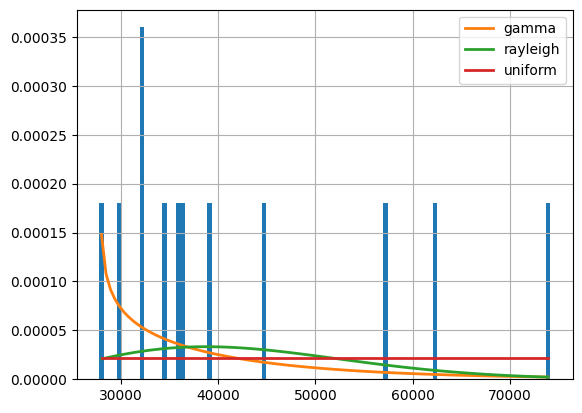

In [81]:
# Dataframes and years weekday
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Loop through dataframes and years
for df, year in zip(dataframes, years):
    observation_per_month_weekday_fit(df, year)

In [82]:
def observation_per_month_weekday(data, year):
    # Filter weekday data 
    weekday_data = data[data['day_type'] == 'Weekday'].copy()

    # Extract month from 'time_observed_at'
    weekday_data['month'] = weekday_data['time_observed_at'].dt.month

    # Group by 'month' and calculate counts
    monthly_counts = weekday_data.groupby('month').size()
  
    # Def month names
    month_names = [calendar.month_abbr[i] for i in range(1, 13)]

    # Plotting
    plt.plot(monthly_counts.index, monthly_counts, label=str(year))
    return monthly_counts

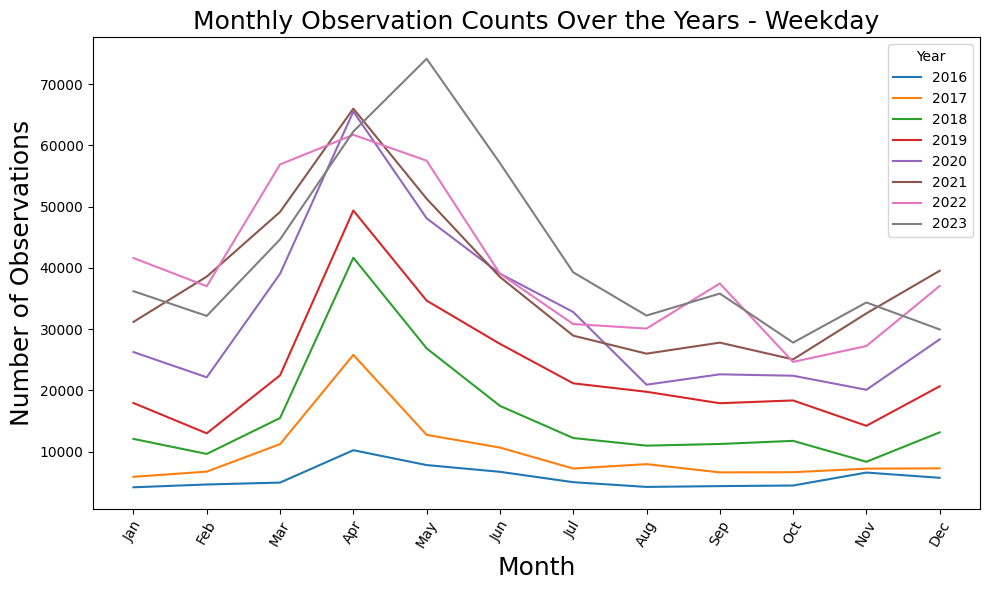

In [83]:
# Dataframes and years weekday
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_month_weekday(df, year)

plt.title('Monthly Observation Counts Over the Years - Weekday',fontsize = 18)
plt.xlabel('Month',fontsize = 18)
plt.ylabel('Number of Observations',fontsize = 18)
plt.legend(title='Year', loc='upper right')
#plt.grid(True)

# Set x-axis ticks to month names
plt.xticks(range(1, 13), labels=calendar.month_abbr[1:], rotation=60)

plt.tight_layout()
plt.show()


## Weekends observation each year 

In [84]:
def observation_per_month_weekend(data, year):
    # Filter weekday data 
    weekend_data = data[data['day_type'] == 'Weekend'].copy()

    # Extract month from 'time_observed_at'
    weekend_data['month'] = weekend_data['time_observed_at'].dt.month

    # Group by 'month' and calculate counts
    monthly_counts = weekend_data.groupby('month').size()
  
    # Def month names
    month_names = [calendar.month_abbr[i] for i in range(1, 13)]

    # Plotting
    plt.plot(monthly_counts.index, monthly_counts, label=str(year))
    return monthly_counts

In [ ]:
# Dataframes and years weekend
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_month_weekend(df, year)

plt.title('Monthly Observation Counts Over the Years - Weekend',fontsize = 18)
plt.xlabel('Month',fontsize = 18)
plt.ylabel('Number of Observations',fontsize = 18)
plt.legend(title='Year', loc='upper right')
#plt.grid(True)

# Set x-axis ticks to month names
plt.xticks(range(1, 13), labels=calendar.month_abbr[1:], rotation=60)

plt.tight_layout()
plt.show()

In [ ]:
#test weekend and weekday
user_counts = sf_2016.groupby(['user_id', 'day_type']).size().reset_index(name='count')
user_counts = user_counts.pivot_table(index='user_id', columns='day_type', values='count', fill_value=0).reset_index()
user_counts.columns.name = None  # Remove the top-level column name
user_counts = user_counts[(user_counts['Weekday'] > 10) & (user_counts['Weekend'] > 10)]
user_counts

In [ ]:
user_counts = user_counts[(user_counts['Weekday'] > 0) & (user_counts['Weekend'] > 0)]

#  subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# subplot (axs[0])
sns.histplot(data=user_counts, x="Weekday", log_scale=(True, True), color="skyblue", label="Weekday", bins=100, ax=axs[0])

# subplot (axs[1])
sns.histplot(data=user_counts, x="Weekend",log_scale=(True, True), color="red", label="Weekend", bins=100, ax=axs[1])

# Add legend 
axs[0].legend()
axs[1].legend()

# Title
plt.suptitle('Observation per user : Weekday vs Weekend')


plt.show()


In [ ]:
data = user_counts[(user_counts['Weekday'] > 0)]
                   
f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
                   
# Display the summary
print(f.summary())


In [ ]:
data_2023 = observation_per_day(sf_2023,2023)


In [ ]:
sns.distplot(data_2023,hist_kws={'weights':W},kde_kws={'bw':0.5},norm_hist=True)

In [ ]:
from scipy.stats import genextreme
from scipy.optimize import curve_fit

In [ ]:
# Define the Gumbel distribution function
"""
x: The variable at which you want to evaluate the PDF probability density function.
mu: The location parameter of the Gumbel distribution.
beta: The scale parameter of the Gumbel distribution.
"""
def gumbel_distribution(x, mu, beta):
    return genextreme.pdf(x, c=-1, loc=mu, scale=beta)

# Define the fitting and plotting function
def fit_and_plot_gumbel(data, year):
    # Define x-axis values (days)
    x_data = np.arange(1, len(data) + 1)
    print(x_data)
    # Fit the Gumbel distribution to the data
    params, covariance = curve_fit(gumbel_distribution, x_data, data)

    # Extract the fitted parameters
    mu, beta = params

    # Generate the fitted curve
    fitted_curve = gumbel_distribution(x_data, mu, beta)

    # Plot the original data 
    plt.plot(x_data, data, label=f'Observations {year}', marker='o')
    
    #plot fitted curve
    plt.plot(x_data, fitted_curve, label=f'Fitted Gumbel Curve {year}', linestyle='--')

    plt.title(f'Fitting Gumbel Distribution to Daily Observations {year}', fontsize=14)
    plt.xlabel('Days', fontsize=12)
    plt.ylabel('Number of Observations', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


data_2023 = observation_per_day(sf_2023, 2023)

# Fit and plot the Gumbel distribution for the year 2023
fit_and_plot_gumbel(data_2023,2023)


In [ ]:
import scipy.stats as stats


In [ ]:
df_2016

In [ ]:
print(type(df_2016["total_obs"]))

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Extract data from the Series (using the .values attribute)
data = df_2016["total_obs"].values

# Fit a Poisson distribution to the data
poisson_params = stats.poisson.fit(data)

# Range of x-axis values (adjust the range as needed)
x_axis = np.arange(0, max(data) + 1)

# Estimate probability density at each x-axis value
poisson_pdf = stats.poisson.pdf(x_axis, *poisson_params)

# Plot the results
plt.plot(x_axis, poisson_pdf, 'o-', label='Poisson Distribution')
plt.xlabel('Number of iNaturalist Observations per User')
plt.ylabel('Probability Density')
plt.title('Distribution of iNaturalist Observations per User (Poisson)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
#test


data = df_2016["total_obs"].dropna().values
print(data)
# Fit a Poisson 
poisson_params = stats.poisson.fit(data)  

# Range of x-axis values 
x_axis = np.arange(0, max(data) + 1)

# Estimate probability density at each x-axis value
poisson_pdf = stats.poisson.pdf(x_axis, *poisson_params)

# Plot the results
plt.plot(x_axis, poisson_pdf, 'o-', label='Poisson Distribution')
plt.xlabel('Number of iNaturalist Observations per User')
plt.ylabel('Probability Density')
plt.title('Distribution of iNaturalist Observations per User (Poisson)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pip install --upgrade scikit-learn


In [ ]:
from statsmodels.discrete.count_model import ZeroInflatedPoisson


In [ ]:

data = observation_per_day(sf_2023, 2023)

# Fit a Zero-Inflated Poisson model
zip_model = ZeroInflatedPoisson()
zip_model.fit(data.reshape(-1, 1))  # Reshape data to 2D if needed

# Access fitted parameters
zip_params = zip_model.get_params()
print(zip_params)


In [ ]:
data = observation_per_day(sf_2016, 2016)


In [ ]:
import statsmodels.api as sm


data = observation_per_day(sf_2016, 2016)

# Create a constant array for the exogenous variable
exog = sm.add_constant(np.ones_like(data))

# Fit 
zip_model = ZeroInflatedPoisson(endog=data, exog=exog)
zip_results = zip_model.fit()

# Access fitted parameters
zip_params = zip_results.params
print(zip_params)


In [ ]:
data = observation_per_day(sf_2016, 2016)

In [ ]:
#Tes
from scipy.stats import poisson


data = observation_per_day(sf_2016, 2016)

# Calculate average rate (lambda)
lambda_value = np.mean(data)

# Range of observations (adjust as needed)
#observations_range = np.arange(0, max(data) + 1)
observations_range = np.arange(0, 31)

# Poisson probabilities for the range
poisson_probs = poisson.pmf(observations_range, lambda_value)

# Plot the Poisson distribution and the actual data
plt.bar(observations_range, poisson_probs, color='blue', alpha=0.7, label='Poisson Distribution')
#plt.hist(data, bins=range(min(data), max(data) + 2), density=True, alpha=0.5, color='green', label='Actual Data')

plt.title('Poisson Distribution vs. Actual Data of iNaturalist Observations per Day (2016)')
plt.xlabel('Total Observations per Day')
plt.ylabel('Probability')
plt.legend()
plt.show()
